In [16]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import re
from sklearn.externals import joblib
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data = pd.read_csv("keiba.csv",encoding="shift-jis",na_values="")
print("データの形")
print(data.shape)
data.head()

データの形
(29918, 12)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,hot_code
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,3
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,3
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,3
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,3
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,3


In [3]:
#Nullチェック
data.isnull().sum()

racekey               0
horse_number          0
horse_name            0
order_of_finish       0
popularity            0
horse_weight          0
tanshou_odds          0
hukushou_odds         0
tanshou_odds_at10     0
hukushou_odds_at10    0
IDM                   0
hot_code              0
dtype: int64

In [4]:
#raceのみを表すID
data.loc[:,"raceid"] = data.loc[:,"racekey"].str[:7]
data.head()

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,hot_code,raceid
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,3,2162201
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,3,2162201
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,3,2162201
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,3,2162201
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,3,2162201


In [5]:
#該当列が数字以外の行を削除

data = data[data["order_of_finish"].str.contains("(\d)+")]
data = data[data["popularity"].str.contains("(\d)+")]
data = data[data["tanshou_odds"].str.contains("(\d)+")]
data = data[data["IDM"].str.contains("(\d)+")]
data = data[data["hot_code"].str.contains("(\d)+")]
data = data[data["tanshou_odds_at10"].str.contains("^(\d)+(?!.*\s).*$")] #正規表現よくわかってない

print(data.shape)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: Use

(28348, 13)


In [6]:
#文字列を数値に変換した行を作る
data.loc[:,"order_of_finish_num"] = data.loc[:,"order_of_finish"].astype(int)
data.loc[:,"popularity_num"] = data.loc[:,"popularity"].astype(int)
data.loc[:,"horse_weight_num"] = data.loc[:,"horse_weight"].astype(int)
data.loc[:,"tanshou_odds_num"] = data.loc[:,"tanshou_odds"].astype(float)
data.loc[:,"tanshou_odds_at10_num"] = data.loc[:,"tanshou_odds_at10"].astype(float)
data.loc[:,"IDM_num"] = data.loc[:,"IDM"].astype(float)
data.loc[:,"hot_code_num"] = data.loc[:,"hot_code"].astype(float)
print(data.shape)
data.head()

(28348, 20)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,hot_code,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,3,2162201,2,4,412,15.8,14.4,31.0,3.0
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,3,2162201,6,2,418,6.9,6.4,18.0,3.0
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,3,2162201,8,9,458,145.4,58.3,11.0,3.0
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,3,2162201,7,5,408,19.8,16.4,15.0,3.0
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,3,2162201,4,8,442,102.3,39.1,29.0,3.0


In [7]:
data =  data.loc[(data.loc[:,"popularity_num"]>=1) & (data.loc[:,"popularity_num"]<=18),:]
print(data.shape)

(28348, 20)


In [8]:
data.loc[:,"tanshou_flag"] = (data.loc[:,"order_of_finish_num"] == 1)
data.head(40)

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,hot_code,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,...,3,2162201,2,4,412,15.8,14.4,31.0,3.0,False
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,...,3,2162201,6,2,418,6.9,6.4,18.0,3.0,False
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,...,3,2162201,8,9,458,145.4,58.3,11.0,3.0,False
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,...,3,2162201,7,5,408,19.8,16.4,15.0,3.0,False
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,...,3,2162201,4,8,442,102.3,39.1,29.0,3.0,False
5,216220106,1410072320160710,マイネルヘミニス,3,3,460,14.5,1.7,12.3,1.7,...,3,2162201,3,3,460,14.5,12.3,28.0,3.0,False
6,216220107,1410167820160710,ピーチメルバ,5,7,452,97.2,7.9,44.4,4.9,...,3,2162201,5,7,452,97.2,44.4,21.0,3.0,False
8,216220109,1410444520160710,エスケークラウン,1,1,492,1.1,1,1.3,1,...,3,2162201,1,1,492,1.1,1.3,36.0,3.0,True
9,216220201,1310080720160710,サンポーツマス,8,9,484,61.9,10.5,21.6,6.2,...,3,2162202,8,9,484,61.9,21.6,31.0,3.0,False
10,216220202,1310451920160710,クインズジュエリー,12,8,434,24.6,4.6,18.4,4.5,...,3,2162202,12,8,434,24.6,18.4,23.0,3.0,False


In [9]:
data.to_csv("data.csv",index=None)

In [9]:
features = ["popularity_num","horse_weight_num","tanshou_odds_at10_num","IDM_num","hot_code_num"]
target = ["tanshou_flag"]

X = data
y = data.loc[:,target]
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
print("デザインマトリックスの形")
print(X.shape)
print("ラベルマトリックス")
print(y.shape)

デザインマトリックスの形
(28348, 21)
ラベルマトリックス
(28348, 1)


データ分割方法どちらか選ぶ↓

In [10]:
#単純に分割する
data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("トレインデータ")
print(data_train.shape)
print(y_train.shape)
print("テストデータ")
print(data_test.shape)
print(y_test.shape)

トレインデータ
(22678, 21)
(22678, 1)
テストデータ
(5670, 21)
(5670, 1)


In [13]:
np.set_printoptions(threshold=np.inf)

#レース単位で分割する
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#1回しかくりかえさない
for train, test in gss.split(X,y,groups=data["raceid"].values.flatten()):
    print( "%s %s" % (train,test))
    print( "%s %s" % (train.shape,test.shape))
    data_train = X.loc[train,:]
    data_test = X.loc[test,:]
    y_train = y.loc[train,:]
    y_test = y.loc[test,:]
    print(data_train.shape)
    print(data_test.shape)
    print(y_train.shape)
    print(y_test.shape)

[    8     9    10    11    12    13    14    15    16    17    18    19
    35    36    37    38    39    40    41    42    43    44    45    46
    47    48    49    50    51    52    53    54    55    56    57    58
    59    60    61    62    63    64    65    66    67    68    69    70
    71    72    73    74    75    76    77    78    79    80    81    82
    83    84    85    86    87    88    89    90    91    92    93    94
    95    96    97    98    99   100   101   102   103   104   105   106
   107   108   109   110   111   112   113   114   115   116   117   118
   119   120   121   122   123   124   125   126   127   128   129   130
   131   132   133   134   135   136   137   138   139   140   141   142
   143   144   145   146   147   148   149   150   151   152   153   154
   155   156   157   158   159   160   161   162   163   164   165   166
   167   184   185   186   187   188   189   190   191   192   193   194
   195   196   197   198   199   200   201   202   

In [14]:
data_train.head(20)

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,hot_code,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag
8,216220201,1310080720160710,サンポーツマス,8,9,484,61.9,10.5,21.6,6.2,...,3,2162202,8,9,484,61.9,21.6,31.0,3.0,False
9,216220202,1310451920160710,クインズジュエリー,12,8,434,24.6,4.6,18.4,4.5,...,3,2162202,12,8,434,24.6,18.4,23.0,3.0,False
10,216220203,1310599020160710,キャンベルアーリー,10,7,436,16.4,3.1,8.5,2.8,...,3,2162202,10,7,436,16.4,8.5,26.0,3.0,False
11,216220204,1310454320160710,フジワンエンジェル,5,1,448,3.7,1.3,6.2,1.4,...,3,2162202,5,1,448,3.7,6.2,35.0,3.0,False
12,216220205,1310402420160710,アカプルコノユウヒ,6,10,442,63.1,7.6,28.3,6.7,...,3,2162202,6,10,442,63.1,28.3,34.0,3.0,False
13,216220206,1310438120160710,ゴセイバイシキモク,7,11,478,137.9,18,62.8,9,...,3,2162202,7,11,478,137.9,62.8,30.0,3.0,False
14,216220207,1310365520160710,グランジュテ,3,5,436,7.9,2.1,6.9,2.2,...,3,2162202,3,5,436,7.9,6.9,36.0,3.0,False
15,216220208,1310282020160710,トルシュローズ,1,2,454,3.7,1.3,5.1,1.6,...,3,2162202,1,2,454,3.7,5.1,51.0,3.0,True
16,216220209,1310157720160710,フレッシュギャル,2,6,436,10.5,2.8,6.7,2.6,...,3,2162202,2,6,436,10.5,6.7,38.0,3.0,False
17,216220210,1310365120160710,イネディット,11,12,394,184.7,24.1,70.9,9.6,...,3,2162202,11,12,394,184.7,70.9,23.0,3.0,False


In [15]:
data_test.head(20)

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,hot_code,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,...,3,2162201,2,4,412,15.8,14.4,31.0,3.0,False
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,...,3,2162201,6,2,418,6.9,6.4,18.0,3.0,False
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,...,3,2162201,8,9,458,145.4,58.3,11.0,3.0,False
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,...,3,2162201,7,5,408,19.8,16.4,15.0,3.0,False
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,...,3,2162201,4,8,442,102.3,39.1,29.0,3.0,False
5,216220106,1410072320160710,マイネルヘミニス,3,3,460,14.5,1.7,12.3,1.7,...,3,2162201,3,3,460,14.5,12.3,28.0,3.0,False
6,216220107,1410167820160710,ピーチメルバ,5,7,452,97.2,7.9,44.4,4.9,...,3,2162201,5,7,452,97.2,44.4,21.0,3.0,False
7,216220109,1410444520160710,エスケークラウン,1,1,492,1.1,1,1.3,1,...,3,2162201,1,1,492,1.1,1.3,36.0,3.0,True
20,216220301,1310167720160710,オーゴンワンダー,10,16,414,177.6,23.2,64.1,7.8,...,3,2162203,10,16,414,177.6,64.1,33.0,3.0,False
21,216220302,1310124420160710,アルファジェイド,15,11,486,82.5,14.9,27.6,5.8,...,3,2162203,15,11,486,82.5,27.6,12.0,3.0,False


In [23]:
#学習に使う列だけ選択
X_train = data_train.loc[:,features]
X_test = data_test.loc[:,features]

In [12]:
#DataFrameのまま扱うとindexが保持されて便利
X_train.head()

,popularity_num,horse_weight_num,tanshou_odds_at10_num,IDM_num,hot_code_num
6847,12,460,53.1,35.0,3.0
17671,4,490,7.6,47.0,3.0
438,6,494,15.1,55.0,3.0
26393,5,462,11.6,40.0,3.0
3389,6,438,8.8,42.0,3.0


In [13]:
#tutrial http://scikit-learn.org/stable/modules/svm.html
# SVC()の説明　http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
clf = svm.SVC()
clf.fit(X_train, y_train)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
joblib.dump(clf, 'clf.pkl') 

['clf.pkl']

In [126]:
clf = joblib.load('clf.pkl') 

In [14]:
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print("train dataのscore:", train_score)
print("test dataのscore:", test_score)

train dataのscore: 0.951583032013
test dataのscore: 0.929805996473


In [15]:
train_y_pred = clf.predict(X_train)
test_y_pred = clf.predict(X_test)

In [16]:
print("train data の　予測の内訳")
print(pd.Series(train_y_pred).value_counts())
print("test data の　予測の内訳")
print(pd.Series(test_y_pred).value_counts())

train data の　予測の内訳
False    22167
True       511
dtype: int64
test data の　予測の内訳
False    5619
True       51
dtype: int64


In [17]:
print("confusion_matrix in train")
print(confusion_matrix(y_train,train_y_pred))
print("confusion_matrix in test")
print(confusion_matrix(y_test,test_y_pred))

confusion_matrix in train
[[21090    21]
 [ 1077   490]]
confusion_matrix in test
[[5248   27]
 [ 371   24]]


In [18]:

tn, fp, fn, tp = confusion_matrix(y_train,train_y_pred).ravel()
print("トレインデータでの精度＝",tp/(tp+fp))
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print("テストデータでの精度＝",tp/(tp+fp))

トレインデータでの精度＝ 0.958904109589
テストデータでの精度＝ 0.470588235294


In [19]:

data_train.loc[:,"predict"] = pd.Series(train_y_pred,index=data_train.index)
print(data_train.shape)


(22678, 22)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
data_test.loc[:,"predict"] = pd.Series(test_y_pred,index=data_test.index)
print(data_test.shape)

(5670, 22)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
data_train_T = data_train.loc[data_train["tanshou_flag"] == True,:]
print(data_train_T.shape)

(1567, 22)


In [22]:
data_train_TP = data_train_T.loc[data_train_T["predict"] == True,:]
print(data_train_TP.shape)

(490, 22)


In [23]:
train_kaisyuuritu = data_train_TP["tanshou_odds_num"].sum()/(data_train.loc[data_train["predict"]==True,:].shape[0])
print("train dataの回収率は",train_kaisyuuritu)

train dataの回収率は 13.259491193737771


In [24]:
data_test_T = data_test.loc[data_test["tanshou_flag"] == True,:]
print(data_test_T.shape)
data_test_TP = data_test_T.loc[data_test_T["predict"] == True,:]
print(data_test_TP.shape)
test_kaisyuuritu = data_test_TP["tanshou_odds_num"].sum()/(data_test.loc[data_test["predict"]==True,:].shape[0])
print("test dataの回収率は",test_kaisyuuritu)

(395, 22)
(24, 22)
test dataの回収率は 1.0647058823529412


In [138]:
data_test_TP

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict
1983,10162b1005,1311000120160903,ストロングタイタン,1,2,522,2.9,1.3,4,1.5,...,10162b1,1,2,522,2.9,4.0,59.0,3.0,True,True
2054,216240402,1310446520160717,ゴテツ,1,1,484,2.3,1.1,3.2,1.3,...,2162404,1,1,484,2.3,3.2,44.0,3.0,True,True
2250,316260806,1310560120160717,ダイワダッチェス,1,1,478,1.8,1.1,2.2,1.5,...,3162608,1,1,478,1.8,2.2,55.0,3.0,True,True
2495,516150115,1310045720160213,カグラグレイス,1,1,484,2.7,1.3,1.9,1.4,...,5161501,1,1,484,2.7,1.9,39.0,3.0,True,True
4052,216140504,1411004320160626,レヴァンテライオン,1,1,476,2.4,1.2,2.5,1.6,...,2161405,1,1,476,2.4,2.5,38.0,3.0,True,True
5725,516170507,1310604120160220,アップクォーク,1,1,484,2.2,1.1,2,1.1,...,5161705,1,1,484,2.2,2.0,43.0,3.0,True,True
6737,116240802,1210428420160828,サトノメサイア,1,1,520,2,1.1,2.7,1.5,...,1162408,1,1,520,2.0,2.7,57.0,3.0,True,True
7335,516370305,1310313720160625,プエルトプリンセサ,1,1,416,2,1.1,2.4,1.1,...,5163703,1,1,416,2.0,2.4,40.0,3.0,True,True
8523,716380203,1310332420160724,ハナズレジェンド,1,2,456,3.5,1.1,3.5,1.2,...,7163802,1,2,456,3.5,3.5,51.0,3.0,True,True
10605,616260707,1010357920160313,ヘイローフォンテン,1,2,538,3.7,1.3,4.1,1.7,...,6162607,1,2,538,3.7,4.1,52.0,3.0,True,True


In [25]:
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid = {'C': [0.1,1,10], 'gamma': [0.1,1,10],"class_weight":[{1:1},{1:5},{1:10},{1:15}]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'class_weight': [{1: 1}, {1: 5}, {1: 10}, {1: 15}]}


In [26]:
clf = svm.SVC(probability = True)

to do:scoringを回収率にしたいので，関数を自作せねばならない

In [15]:
grid_search = GridSearchCV(clf, param_grid, cv=5,scoring="precision",verbose=3,n_jobs=-1)

NameError: name 'clf' is not defined

In [13]:
grid_search.fit(X_train, y_train.values.flatten())

NameError: name 'grid_search' is not defined

In [24]:
joblib.dump(grid_search, 'gs.pkl') 

['gs.pkl']

In [25]:
grid_search = joblib.load('gs.pkl') 

In [26]:
result = pd.DataFrame(grid_search.cv_results_)
print(result.shape)
result

(36, 23)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_class_weight,param_gamma,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,144.538467,2.782559,0.000000,0.000000,0.1,{1: 1},0.1,"{'C': 0.1, 'class_weight': {1: 1}, 'gamma': 0.1}",32,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.232121,0.822209,0.000000,0.000000
1,363.376384,6.103549,0.000000,0.000000,0.1,{1: 1},1,"{'C': 0.1, 'class_weight': {1: 1}, 'gamma': 1}",32,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.058183,2.023154,0.000000,0.000000
2,481.388534,6.446969,0.000000,0.000000,0.1,{1: 1},10,"{'C': 0.1, 'class_weight': {1: 1}, 'gamma': 10}",32,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.158533,2.000521,0.000000,0.000000
3,195.055756,2.624750,0.346543,0.490044,0.1,{1: 5},0.1,"{'C': 0.1, 'class_weight': {1: 5}, 'gamma': 0.1}",3,0.382883,...,0.346491,0.493494,0.367521,0.499010,0.312500,0.500963,4.398185,0.015908,0.026305,0.010751
4,496.149778,6.269359,0.000000,0.976190,0.1,{1: 5},1,"{'C': 0.1, 'class_weight': {1: 5}, 'gamma': 1}",32,0.000000,...,0.000000,0.958333,0.000000,0.964286,0.000000,0.958333,158.803968,1.930315,0.000000,0.019562
5,576.218558,6.375165,0.000000,1.000000,0.1,{1: 5},10,"{'C': 0.1, 'class_weight': {1: 5}, 'gamma': 10}",32,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,188.518165,2.018356,0.000000,0.000000
6,220.325002,2.805160,0.260348,0.396671,0.1,{1: 10},0.1,"{'C': 0.1, 'class_weight': {1: 10}, 'gamma': 0.1}",22,0.284983,...,0.251300,0.410389,0.265700,0.386247,0.268603,0.401480,4.486776,0.067238,0.018102,0.008507
7,494.675094,6.081348,0.358094,0.978259,0.1,{1: 10},1,"{'C': 0.1, 'class_weight': {1: 10}, 'gamma': 1}",2,0.357143,...,0.400000,0.973279,0.300000,0.980328,0.400000,0.981086,141.620883,2.005217,0.038731,0.003001
8,492.150349,5.630722,0.283336,1.000000,0.1,{1: 10},10,"{'C': 0.1, 'class_weight': {1: 10}, 'gamma': 10}",21,0.333333,...,0.250000,1.000000,0.250000,1.000000,0.333333,1.000000,11.594681,0.264544,0.040825,0.000000
9,226.786572,3.972427,0.226752,0.348321,0.1,{1: 15},0.1,"{'C': 0.1, 'class_weight': {1: 15}, 'gamma': 0.1}",28,0.252918,...,0.218593,0.356025,0.234644,0.341660,0.224647,0.348159,70.372747,1.237126,0.016641,0.004709


In [27]:
result.to_csv("gs_result.csv")

In [28]:
param = grid_search.best_params_
param

{'C': 1, 'class_weight': {1: 1}, 'gamma': 0.1}

In [29]:
train_y_pred = grid_search.predict(X_train)
test_y_pred = grid_search.predict(X_test)

In [30]:
print("train data の　予測の内訳")
print(pd.Series(train_y_pred).value_counts())
print("test data の　予測の内訳")
print(pd.Series(test_y_pred).value_counts())

train data の　予測の内訳
False    22366
True       312
dtype: int64
test data の　予測の内訳
False    5625
True       45
dtype: int64


In [31]:
print("confusion_matrix in train")
print(confusion_matrix(y_train,train_y_pred))
print("confusion_matrix in test")
print(confusion_matrix(y_test,test_y_pred))

confusion_matrix in train
[[21082    29]
 [ 1284   283]]
confusion_matrix in test
[[5255   20]
 [ 370   25]]


In [32]:
tn, fp, fn, tp = confusion_matrix(y_train,train_y_pred).ravel()
print("トレインデータでの精度＝",tp/(tp+fp))
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print("テストデータでの精度＝",tp/(tp+fp))

トレインデータでの精度＝ 0.907051282051
テストデータでの精度＝ 0.555555555556


In [33]:
data_train.loc[:,"predict"] = pd.Series(train_y_pred,index=data_train.index)
data_test.loc[:,"predict"] = pd.Series(test_y_pred,index=data_test.index)
data_train_T = data_train.loc[data_train["tanshou_flag"] == True,:]
data_train_TP = data_train_T.loc[data_train_T["predict"] == True,:]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
train_kaisyuuritu = data_train_TP["tanshou_odds_num"].sum()/(data_train.loc[data_train["predict"]==True,:].shape[0])
print("train dataの回収率は",train_kaisyuuritu)

train dataの回収率は 10.359294871794871


In [35]:
data_test_T = data_test.loc[data_test["tanshou_flag"] == True,:]
print(data_test_T.shape)
data_test_TP = data_test_T.loc[data_test_T["predict"] == True,:]
print(data_test_TP.shape)
test_kaisyuuritu = data_test_TP["tanshou_odds_num"].sum()/(data_test.loc[data_test["predict"]==True,:].shape[0])
print("test dataの回収率は",test_kaisyuuritu)

(395, 22)
(25, 22)
test dataの回収率は 1.2799999999999998


In [36]:
data_test_TP

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict
19597,515140616,1010435320150208,クロムレック,1,1,538,2.2,1.2,2.6,1.3,...,5151406,1,1,538,2.2,2.6,52.0,3.0,True,True
17710,615360303,1210622820150412,レッドカノーヴァ,1,1,470,1.1,1,1.2,1,...,6153603,1,1,470,1.1,1.2,38.0,3.0,True,True
11904,1016260906,1311000820160814,リッチーリッチー,1,2,512,2.3,1.1,2.3,1.1,...,1016260,1,2,512,2.3,2.3,54.0,3.0,True,True
3782,516561007,1110396420161120,ディアデルレイ,1,1,506,3.3,1.4,4.3,1.1,...,5165610,1,1,506,3.3,4.3,65.0,3.0,True,True
19778,815240712,1010481520150208,ラローザブル,1,1,518,2.4,1.2,2.8,1.3,...,8152407,1,1,518,2.4,2.8,56.0,3.0,True,True
5345,616430114,1410446820160917,ブルーヘヴン,1,1,484,1.9,1.1,2,1.1,...,6164301,1,1,484,1.9,2.0,40.0,3.0,True,True
15461,916141202,1210142120160306,オヒア,1,2,456,4.6,1.5,2.7,2.2,...,9161412,1,2,456,4.6,2.7,59.0,3.0,True,True
22761,815191001,1111006920150125,マスクゾロ,1,1,536,2.5,1.3,3.4,1.7,...,8151910,1,1,536,2.5,3.4,61.0,3.0,True,True
26688,715320501,1310566220150705,ロスカボス,1,2,496,2.8,1.1,3.5,1.2,...,7153205,1,2,496,2.8,3.5,41.0,3.0,True,True
25340,315261213,1210597920150719,パワーポケット,1,1,520,2.7,1.2,3.1,1.2,...,3152612,1,1,520,2.7,3.1,56.0,3.0,True,True


確率を出力するhttp://scikit-learn.org/stable/modules/svm.html#scores-probabilities

In [37]:
tr_predict_proba = grid_search.predict_proba(X_train)
tr_predict_proba

array([[ 0.93797084,  0.06202916],
       [ 0.93922637,  0.06077363],
       [ 0.94673232,  0.05326768],
       ..., 
       [ 0.93918495,  0.06081505],
       [ 0.94206772,  0.05793228],
       [ 0.93926212,  0.06073788]])

In [38]:
tr_predict = grid_search.predict(X_train)
tr_predict

array([False, False, False, ..., False, False, False], dtype=bool)

In [39]:
te_predict_proba = grid_search.predict_proba(X_test)
te_predict_proba

array([[ 0.93861488,  0.06138512],
       [ 0.94900057,  0.05099943],
       [ 0.93899598,  0.06100402],
       ..., 
       [ 0.93845436,  0.06154564],
       [ 0.93237178,  0.06762822],
       [ 0.93637846,  0.06362154]])

In [40]:
te_predict = grid_search.predict(X_test)
te_predict

array([False, False, False, ..., False, False, False], dtype=bool)

In [41]:
df_tr_proba = pd.DataFrame(tr_predict_proba)
df_tr_proba

,0,1
0,0.937971,0.062029
1,0.939226,0.060774
2,0.946732,0.053268
3,0.945767,0.054233
4,0.956082,0.043918
5,0.939218,0.060782
6,0.939418,0.060582
7,0.945473,0.054527
8,0.939283,0.060717
9,0.940267,0.059733


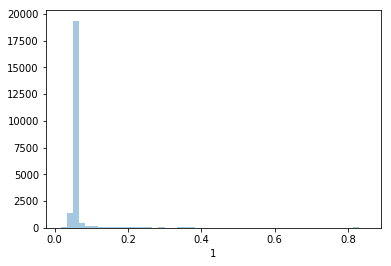

In [42]:
sns.distplot(df_tr_proba.loc[:,1],kde=None)

In [43]:
#予想がPのインスタンスのクラス所属確率
df_tr_proba.index = data_train.index.values[:22678]
df_tr_proba.loc[tr_predict,:]

,0,1
13111,0.480293,0.519707
21045,0.175924,0.824076
22427,0.175906,0.824094
18350,0.191881,0.808119
17983,0.516227,0.483773
3919,0.318191,0.681809
23968,0.305625,0.694375
11538,0.613052,0.386948
19503,0.535007,0.464993
749,0.422226,0.577774


In [44]:
data_train.loc[:,"tanshou_proba"] = df_tr_proba.loc[:,1]
print(data_train.shape)
data_train.head()

(22678, 23)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba
6847,04162a0311,1310911220160828,テンエイロータス,7,12,460,109,12.9,53.1,7.6,...,7,12,460,109.0,53.1,35.0,3.0,False,False,0.062029
17671,315121212,1111005920150412,シンガン,12,4,490,8.3,2.5,7.6,2.2,...,12,4,490,8.3,7.6,47.0,3.0,False,False,0.060774
438,716341005,1310565220160710,サトノエトワール,4,6,494,13.4,3.1,15.1,3.5,...,4,6,494,13.4,15.1,55.0,3.0,False,False,0.053268
26393,215160612,1110261320150705,タマモエスカルゴ,8,5,462,16.9,2.3,11.6,2.4,...,8,5,462,16.9,11.6,40.0,3.0,False,False,0.054233
3389,816470701,1310034020161023,シルバーメール,10,6,438,15.9,3.1,8.8,3.3,...,10,6,438,15.9,8.8,42.0,3.0,False,False,0.043918


In [45]:
data_train.loc[:,"tanshou_odds*tanshou_proba"] = data_train["tanshou_odds_num"] * data_train["tanshou_proba"]
data_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
6847,04162a0311,1310911220160828,テンエイロータス,7,12,460,109,12.9,53.1,7.6,...,12,460,109.0,53.1,35.0,3.0,False,False,0.062029,6.761179
17671,315121212,1111005920150412,シンガン,12,4,490,8.3,2.5,7.6,2.2,...,4,490,8.3,7.6,47.0,3.0,False,False,0.060774,0.504421
438,716341005,1310565220160710,サトノエトワール,4,6,494,13.4,3.1,15.1,3.5,...,6,494,13.4,15.1,55.0,3.0,False,False,0.053268,0.713787
26393,215160612,1110261320150705,タマモエスカルゴ,8,5,462,16.9,2.3,11.6,2.4,...,5,462,16.9,11.6,40.0,3.0,False,False,0.054233,0.916544
3389,816470701,1310034020161023,シルバーメール,10,6,438,15.9,3.1,8.8,3.3,...,6,438,15.9,8.8,42.0,3.0,False,False,0.043918,0.698290


In [46]:
tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba"])>1,:]
print(tr_kaime.shape)
tr_kaime

(13903, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
6847,04162a0311,1310911220160828,テンエイロータス,7,12,460,109,12.9,53.1,7.6,...,12,460,109.0,53.1,35.0,3.0,False,False,0.062029,6.761179
11681,416260517,1410312220160814,トランプカード,7,6,444,35.5,5.1,35.1,4.5,...,6,444,35.5,35.1,24.0,3.0,False,False,0.060782,2.157768
26947,515181002,910375920150222,ロジサンデー,11,12,476,121.8,14.8,55.7,7.7,...,12,476,121.8,55.7,52.0,3.0,False,False,0.060582,7.378926
15743,515420602,1110200320151011,リースリング,5,13,458,64,7.8,28,5.1,...,13,458,64.0,28.0,44.0,3.0,False,False,0.054527,3.489718
4599,616420807,1310454720160911,ゴールデンレッグ,13,12,446,148.6,19.7,81.7,12.1,...,12,446,148.6,81.7,30.0,3.0,False,False,0.060717,9.022520
23951,715410802,1110438820151205,マンオブグァテマラ,12,11,474,43.1,6.8,29.4,4.1,...,11,474,43.1,29.4,47.0,3.0,False,False,0.059733,2.574494
25177,215241206,1010622620150719,ゴッドフロアー,12,8,512,20,3.9,13.8,2.8,...,8,512,20.0,13.8,47.0,3.0,False,False,0.059878,1.197565
14848,616151214,1110540120160116,フィリグラーナ,12,14,446,197.8,23.3,56.7,7,...,14,446,197.8,56.7,48.0,3.0,False,False,0.059719,11.812511
18252,515250506,1210080220150509,スペシャルヴォーグ,16,14,436,230.4,39,67.9,17.9,...,14,436,230.4,67.9,12.0,3.0,False,False,0.060816,14.011988
3564,316360812,1310437820161120,パルパルパンダ,8,9,472,42.4,6.2,25.6,7.8,...,9,472,42.4,25.6,43.0,3.0,False,False,0.053756,2.279270


In [47]:
tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
print(tr_kaime_TP.shape)
tr_kaime_TP.head()

(693, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
13111,516291204,1110374320160521,ヘイジームーン,1,1,494,2.4,1.1,2.6,1.1,...,1,494,2.4,2.6,60.0,3.0,True,True,0.519707,1.247297
19292,915111108,1210468520150228,ヤングマンパワー,1,9,522,34.8,5.9,24.4,4.2,...,9,522,34.8,24.4,53.0,3.0,True,False,0.309743,10.779055
26777,715321106,1010404220150705,ウリウリ,1,2,468,5.1,1.8,5.8,2.2,...,2,468,5.1,5.8,69.0,3.0,True,False,0.297884,1.519206
6495,716330207,1310284020160709,ケルティックソード,1,3,498,6,2,4.5,1.9,...,3,498,6.0,4.5,40.0,3.0,True,False,0.171587,1.029521
755,516231001,1010288120160430,オリオンザジャパン,1,8,472,20.5,4.4,14.3,3.2,...,8,472,20.5,14.3,62.0,3.0,True,False,0.127554,2.614857


In [48]:
train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
print(train_kaisyuuritu)

0.9653024527080485


In [49]:
df_te_proba = pd.DataFrame(te_predict_proba)
df_te_proba.index = data_test.index.values[:5798]
print(df_te_proba.shape)
df_te_proba.head()

(5670, 2)


,0,1
676,0.938615,0.061385
28154,0.949001,0.050999
16830,0.938996,0.061004
8046,0.940520,0.059480
9267,0.960292,0.039708


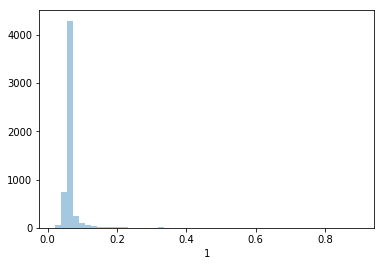

In [50]:
sns.distplot(df_te_proba.loc[:,1],kde=None)

In [51]:
print(df_te_proba.loc[te_predict,:].shape)
df_te_proba.loc[te_predict,:].head()

(45, 2)


,0,1
19597,0.494362,0.505638
17710,0.185633,0.814367
11904,0.229350,0.770650
3782,0.439645,0.560355
19778,0.393062,0.606938


In [52]:
data_test.loc[:,"tanshou_proba"] = df_te_proba.loc[:,1]
data_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba
676,516230409,1310486820160430,クインズクオーツ,7,4,438,11.7,2.2,14,3.2,...,7,4,438,11.7,14.0,27.0,3.0,False,False,0.061385
28154,715131101,1010404820150124,ローズミラクル,3,5,542,6.8,2.4,7.3,2.5,...,3,5,542,6.8,7.3,54.0,3.0,False,False,0.050999
16830,05152a1207,810280920150524,オメガスカイツリー,7,13,502,104.9,19.5,53.4,7.7,...,7,13,502,104.9,53.4,56.0,3.0,False,False,0.061004
8046,1016150415,1310175920160227,アタンドリール,12,4,442,14,2.9,9.6,2.6,...,12,4,442,14.0,9.6,29.0,3.0,False,False,0.059480
9267,516120601,1110222120160131,キネオフォルツァ,2,2,534,4.1,1.4,5.2,2,...,2,2,534,4.1,5.2,51.0,3.0,False,False,0.039708


In [53]:
data_test.loc[:,"tanshou_odds*tanshou_proba"] = data_test["tanshou_odds_num"] * data_test["tanshou_proba"]
data_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
676,516230409,1310486820160430,クインズクオーツ,7,4,438,11.7,2.2,14,3.2,...,4,438,11.7,14.0,27.0,3.0,False,False,0.061385,0.718206
28154,715131101,1010404820150124,ローズミラクル,3,5,542,6.8,2.4,7.3,2.5,...,5,542,6.8,7.3,54.0,3.0,False,False,0.050999,0.346796
16830,05152a1207,810280920150524,オメガスカイツリー,7,13,502,104.9,19.5,53.4,7.7,...,13,502,104.9,53.4,56.0,3.0,False,False,0.061004,6.399322
8046,1016150415,1310175920160227,アタンドリール,12,4,442,14,2.9,9.6,2.6,...,4,442,14.0,9.6,29.0,3.0,False,False,0.059480,0.832719
9267,516120601,1110222120160131,キネオフォルツァ,2,2,534,4.1,1.4,5.2,2,...,2,534,4.1,5.2,51.0,3.0,False,False,0.039708,0.162803


In [54]:
te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba"])>1,:]
print(te_kaime.shape)
te_kaime

(3503, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
16830,05152a1207,810280920150524,オメガスカイツリー,7,13,502,104.9,19.5,53.4,7.7,...,13,502,104.9,53.4,56.0,3.0,False,False,0.061004,6.399322
13249,816390901,1310560620160521,ファスナハト,8,8,540,30.7,5.4,16.3,3.8,...,8,540,30.7,16.3,45.0,5.0,False,False,0.063492,1.949205
15945,815420910,1310163620151011,アラモアナワヒネ,4,7,452,13.7,3.3,15.3,3.1,...,7,452,13.7,15.3,42.0,3.0,False,False,0.077639,1.063658
9143,1016161003,1310053820160228,クラウンドジャック,16,12,460,67.3,11.3,35.6,7,...,12,460,67.3,35.6,-30.0,3.0,False,False,0.063673,4.285163
4642,616421109,1010590420160911,ワキノブレイブ,15,15,490,143,19.2,109.9,15.6,...,15,490,143.0,109.9,58.0,5.0,False,False,0.063325,9.055517
6059,1016130314,1310477420160220,パーリオミノル,5,10,440,30.4,8.2,25,7.4,...,10,440,30.4,25.0,36.0,3.0,False,False,0.093295,2.836172
25419,715360610,1310403920150719,コパデグレース,7,6,468,24.1,2.7,24.3,3.8,...,6,468,24.1,24.3,20.0,3.0,False,False,0.061208,1.475104
22617,715141109,1010456220150125,ソロル,5,7,504,25.8,3.3,17.1,3.3,...,7,504,25.8,17.1,68.0,3.0,False,False,0.092467,2.385660
25157,215241102,610675420150719,サイモントルナーレ,13,16,454,256.2,35.2,170.9,23.4,...,16,454,256.2,170.9,38.0,3.0,False,False,0.063462,16.259002
4348,916380302,1310405320160626,マリンランプ,14,13,406,174.7,32.5,45.4,11.1,...,13,406,174.7,45.4,19.0,3.0,False,False,0.062482,10.915573


In [55]:
te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
print(te_kaime_TP.shape)
te_kaime_TP.head()

(78, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
19597,515140616,1010435320150208,クロムレック,1,1,538,2.2,1.2,2.6,1.3,...,1,538,2.2,2.6,52.0,3.0,True,True,0.505638,1.112403
17080,515150604,1210622620150214,トゥルッリ,1,9,476,31.8,4.5,16.5,3.9,...,9,476,31.8,16.5,54.0,3.0,True,False,0.083616,2.658985
11904,1016260906,1311000820160814,リッチーリッチー,1,2,512,2.3,1.1,2.3,1.1,...,2,512,2.3,2.3,54.0,3.0,True,True,0.770650,1.772496
9588,816220606,1310517220160131,コクスイセン,1,6,492,26.6,3.6,15.9,2.7,...,6,492,26.6,15.9,53.0,3.0,True,False,0.043869,1.166925
11680,416260516,1410159020160814,シャイニードライヴ,1,12,446,91.5,9.9,63.7,7.6,...,12,446,91.5,63.7,34.0,3.0,True,False,0.060915,5.573758


In [56]:
test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
print(test_kaisyuuritu)

0.9599771624322013


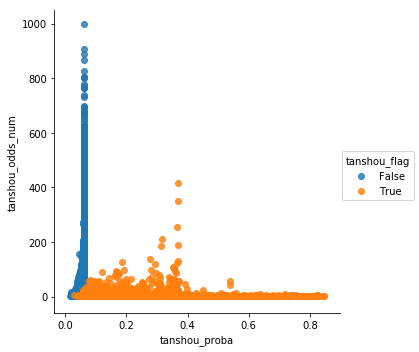

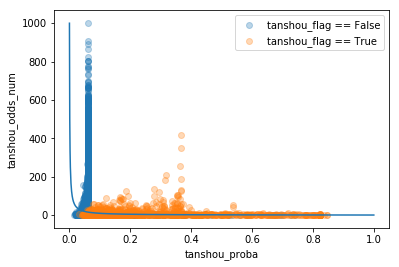

In [57]:
sns.lmplot(data=data_train,x="tanshou_proba",y="tanshou_odds_num", hue="tanshou_flag",fit_reg=False)
x = np.linspace(0.001,1,1000)
plt.figure(0)
plt.plot(x,1/x)
plt.scatter(data_train.loc[data_train["tanshou_flag"] == False,"tanshou_proba"],data_train.loc[data_train["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
plt.scatter(data_train.loc[data_train["tanshou_flag"] == True,"tanshou_proba"],data_train.loc[data_train["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
plt.legend()
plt.xlabel("tanshou_proba")
plt.ylabel("tanshou_odds_num")
plt.show()

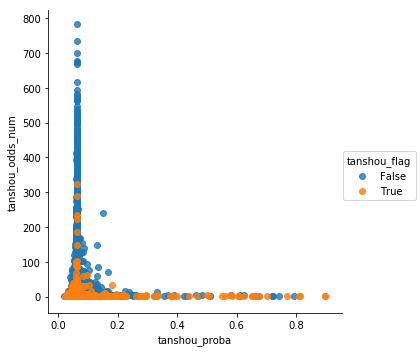

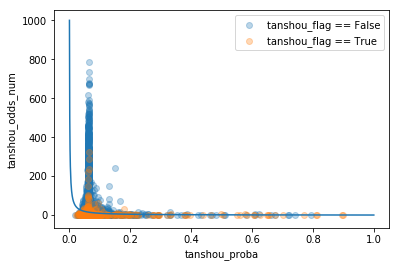

In [58]:
sns.lmplot(data=data_test,x="tanshou_proba",y="tanshou_odds_num", hue="tanshou_flag",fit_reg=False)
x = np.linspace(0.001,1,1000)
plt.figure(0)
plt.plot(x,1/x)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == False,"tanshou_proba"],data_test.loc[data_test["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == True,"tanshou_proba"],data_test.loc[data_test["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
plt.legend()
plt.xlabel("tanshou_proba")
plt.ylabel("tanshou_odds_num")
plt.show()

testにおいて勝った馬と負けた馬の分布に差が見えないのでうまくいってない気がする

## オッズ×確率の閾値を最適なものにする

閾値によっても回収率が変化しそうなので最適化する

閾値 0.5
トレインデータ:
回収率= 0.8945599091425326
買い目数= 17610
TP= 1070
精度= 0.06076093128904032
テストデータ:
回収率= 0.914
買い目数= 4450
TP= 160
精度= 0.035955056179775284
________________________________________________________________


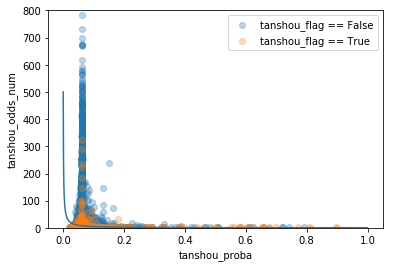

閾値 0.8
トレインデータ:
回収率= 0.9420600858369099
買い目数= 15145
TP= 814
精度= 0.053747111257840874
テストデータ:
回収率= 0.9135036496350367
買い目数= 3836
TP= 94
精度= 0.024504692387904068
________________________________________________________________


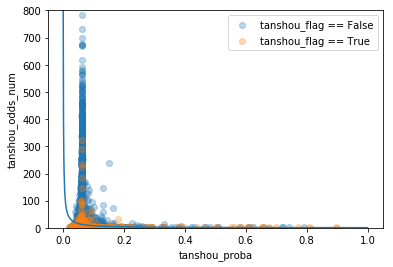

閾値 1
トレインデータ:
回収率= 0.9653024527080485
買い目数= 13903
TP= 693
精度= 0.049845357117168955
テストデータ:
回収率= 0.9599771624322013
買い目数= 3503
TP= 78
精度= 0.02226662860405367
________________________________________________________________


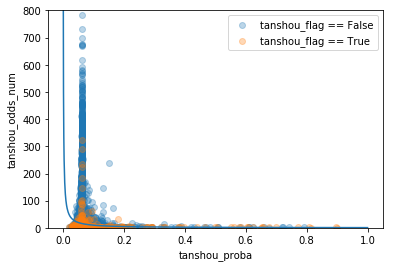

閾値 1.1
トレインデータ:
回収率= 0.9781074398741287
買い目数= 13347
TP= 632
精度= 0.04735146474863265
テストデータ:
回収率= 0.9923031203566124
買い目数= 3365
TP= 73
精度= 0.021693907875185735
________________________________________________________________


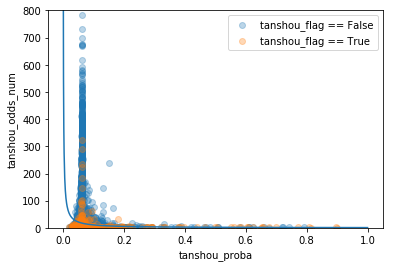

閾値 1.3
トレインデータ:
回収率= 0.9929033301002259
買い目数= 12372
TP= 529
精度= 0.04275784028451342
テストデータ:
回収率= 1.0302133078637379
買い目数= 3141
TP= 64
精度= 0.02037567653613499
________________________________________________________________


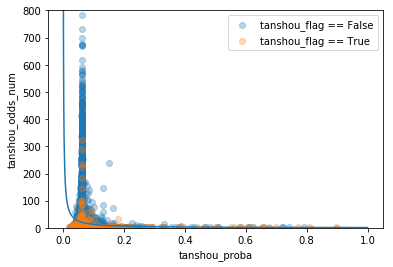

閾値 1.5
トレインデータ:
回収率= 1.0139320767827675
買い目数= 11513
TP= 455
精度= 0.039520541996004514
テストデータ:
回収率= 1.0302739726027401
買い目数= 2920
TP= 52
精度= 0.01780821917808219
________________________________________________________________


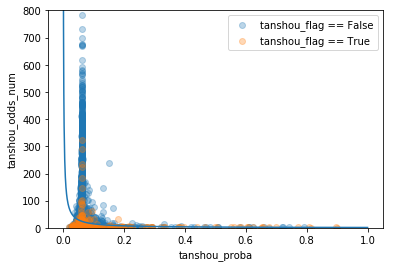

閾値 2
トレインデータ:
回収率= 1.0754453054241728
買い目数= 9937
TP= 344
精度= 0.03461809399215055
テストデータ:
回収率= 1.033872239747634
買い目数= 2536
TP= 30
精度= 0.011829652996845425
________________________________________________________________


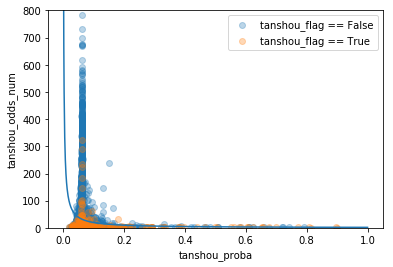

閾値 3
トレインデータ:
回収率= 1.1463062837075133
買い目数= 7973
TP= 209
精度= 0.02621347046281199
テストデータ:
回収率= 1.103861386138614
買い目数= 2020
TP= 18
精度= 0.00891089108910891
________________________________________________________________


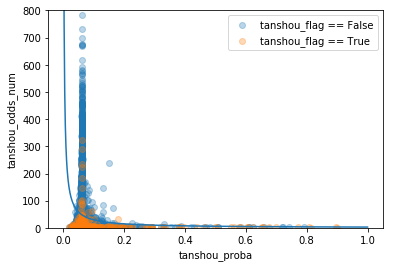

閾値 4
トレインデータ:
回収率= 1.2504681365146484
買い目数= 6622
TP= 156
精度= 0.023557837511325883
テストデータ:
回収率= 1.258855421686747
買い目数= 1660
TP= 15
精度= 0.009036144578313253
________________________________________________________________


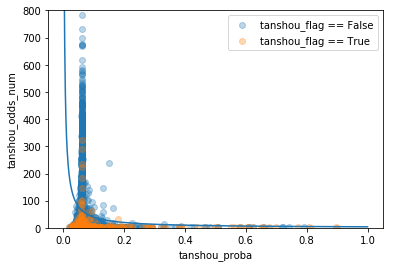

閾値 5
トレインデータ:
回収率= 1.3145658263305326
買い目数= 5712
TP= 126
精度= 0.022058823529411766
テストデータ:
回収率= 1.4024303073624018
買い目数= 1399
TP= 13
精度= 0.009292351679771264
________________________________________________________________


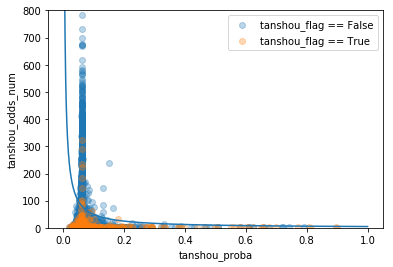

閾値 6
トレインデータ:
回収率= 1.3926413946888305
買い目数= 4933
TP= 103
精度= 0.020879789174944253
テストデータ:
回収率= 1.3399665551839464
買い目数= 1196
TP= 8
精度= 0.006688963210702341
________________________________________________________________


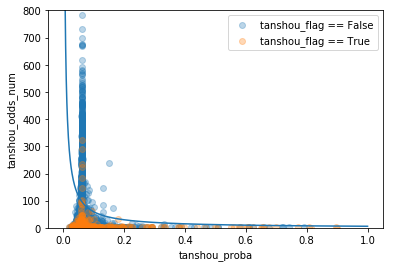

閾値 7
トレインデータ:
回収率= 1.5098868098868101
買い目数= 4329
TP= 90
精度= 0.02079002079002079
テストデータ:
回収率= 1.3611650485436892
買い目数= 1030
TP= 6
精度= 0.005825242718446602
________________________________________________________________


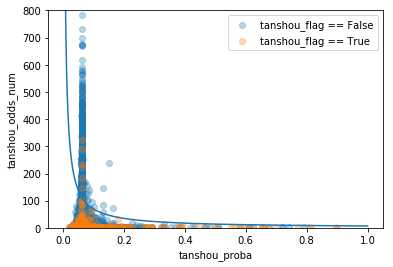

閾値 8
トレインデータ:
回収率= 1.6518078648719983
買い目数= 3789
TP= 81
精度= 0.021377672209026127
テストデータ:
回収率= 1.585972850678733
買い目数= 884
TP= 6
精度= 0.006787330316742082
________________________________________________________________


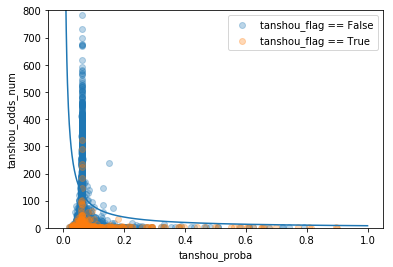

閾値 9
トレインデータ:
回収率= 1.8205882352941178
買い目数= 3332
TP= 75
精度= 0.022509003601440578
テストデータ:
回収率= 1.8326797385620914
買い目数= 765
TP= 6
精度= 0.00784313725490196
________________________________________________________________


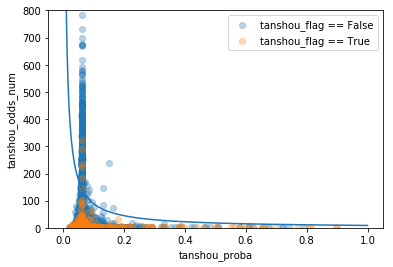

閾値 10
トレインデータ:
回収率= 2.039435146443515
買い目数= 2868
TP= 70
精度= 0.024407252440725245
テストデータ:
回収率= 1.8527326440177252
買い目数= 677
TP= 5
精度= 0.007385524372230428
________________________________________________________________


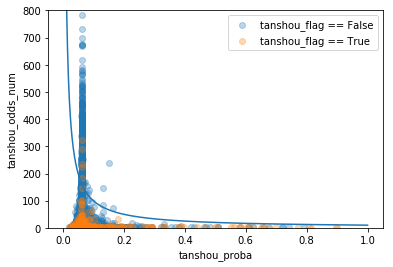

In [61]:
for i in [0.5,0.8,1,1.1,1.3,1.5,2,3,4,5,6,7,8,9,10]:
    
    print("閾値",i)
    tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba"])>i,:]
    tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
    train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
    print("トレインデータ:")
    print("回収率=",train_kaisyuuritu)
    print("買い目数=",tr_kaime.shape[0])
    print("TP=",tr_kaime_TP.shape[0])
    print("精度=",tr_kaime_TP.shape[0]/tr_kaime.shape[0])

    te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba"])>i,:]
    te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
    test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
    print("テストデータ:")
    print("回収率=",test_kaisyuuritu)
    print("買い目数=",te_kaime.shape[0])
    print("TP=",te_kaime_TP.shape[0])
    print("精度=",te_kaime_TP.shape[0]/te_kaime.shape[0])
    
    print("________________________________________________________________")
    x = np.linspace(0.001,1,1000)
    plt.figure(0)
    plt.plot(x,i/x)
    plt.scatter(data_test.loc[data_test["tanshou_flag"] == False,"tanshou_proba"],data_test.loc[data_test["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
    plt.scatter(data_test.loc[data_test["tanshou_flag"] == True,"tanshou_proba"],data_test.loc[data_test["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
    plt.legend()
    plt.xlabel("tanshou_proba")
    plt.ylabel("tanshou_odds_num")
    plt.ylim(0,800)
    plt.show()


閾値10のときの気になる

In [63]:
i = 10
    
print("閾値",i)
tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba"])>i,:]
tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
print("トレインデータ:")
print("回収率=",train_kaisyuuritu)
print("買い目数=",tr_kaime.shape[0])
print("TP=",tr_kaime_TP.shape[0])
print("精度=",tr_kaime_TP.shape[0]/tr_kaime.shape[0])

te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba"])>i,:]
te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
print("テストデータ:")
print("回収率=",test_kaisyuuritu)
print("買い目数=",te_kaime.shape[0])
print("TP=",te_kaime_TP.shape[0])
print("精度=",te_kaime_TP.shape[0]/te_kaime.shape[0])
    
print("________________________________________________________________")

data_test.loc[(data_test["tanshou_odds*tanshou_proba"])>10,:].head(20)

閾値 10
トレインデータ:
回収率= 2.039435146443515
買い目数= 2868
TP= 70
精度= 0.024407252440725245
テストデータ:
回収率= 1.8527326440177252
買い目数= 677
TP= 5
精度= 0.007385524372230428
________________________________________________________________


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
25157,215241102,610675420150719,サイモントルナーレ,13,16,454,256.2,35.2,170.9,23.4,...,16,454,256.2,170.9,38.0,3.0,False,False,0.063462,16.259002
4348,916380302,1310405320160626,マリンランプ,14,13,406,174.7,32.5,45.4,11.1,...,13,406,174.7,45.4,19.0,3.0,False,False,0.062482,10.915573
6246,216210405,1310136920160709,グアディアーナ,15,16,462,202.5,42.8,77.1,15.8,...,16,462,202.5,77.1,28.0,3.0,False,False,0.062156,12.586603
11971,316110203,1310008320160409,セシルクラウン,7,15,490,180.8,14.2,148,7.5,...,15,490,180.8,148.0,33.0,3.0,False,False,0.062641,11.325450
22625,715141203,810101220150125,アルスマルカート,6,16,480,258.4,37,139.1,21,...,16,480,258.4,139.1,49.0,3.0,False,False,0.063319,16.361552
8662,716381210,1310215220160724,マイネルボールド,17,17,436,332.1,47.3,179.8,21.9,...,17,436,332.1,179.8,25.0,3.0,False,False,0.063292,21.019261
10704,716220212,1310120420160313,シャイニーレディ,14,14,470,212.8,22.5,116.1,13.2,...,14,470,212.8,116.1,21.0,3.0,False,False,0.062463,13.292087
17685,615360110,1210271020150412,ウエスタンジュリア,10,12,428,222.3,27.2,136.9,15.9,...,12,428,222.3,136.9,19.0,3.0,False,False,0.062894,13.981277
22393,615190803,1110597920150125,ロマンシーズ,8,14,524,236.2,28.6,86.8,13.9,...,14,524,236.2,86.8,41.0,3.0,False,False,0.063312,14.954199
7886,916110604,1310159120160227,テイエムプリオネ,11,11,464,247.3,26.7,68.4,12.1,...,11,464,247.3,68.4,21.0,3.0,False,False,0.061050,15.097576


この方法はオッズが高いものにしぼって当てることによって回収率をあげていることがわかる  

## 確率をレースごとに正規化する

↓あるレースにおいて，それぞれの馬が単勝する確率の合計が1にならないのはおかしい  
正規化する

In [85]:
#data全体に予測列を追加
predict_all = grid_search.predict_proba(data.loc[:,features])
print(predict_all.shape)


(28348, 2)


In [86]:
predict_all_df = pd.DataFrame(predict_all)
predict_all_df.head()

,0,1
0,0.938022,0.061978
1,0.939255,0.060745
2,0.937733,0.062267
3,0.939301,0.060699
4,0.938504,0.061496


In [87]:
data.loc[:,"tanshou_proba"] = predict_all_df.loc[:,1]

In [88]:
data.loc[data["raceid"]=="2162201",:]

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,...,2162201,2,4,412,15.8,14.4,31.0,3.0,False,0.061978
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,...,2162201,6,2,418,6.9,6.4,18.0,3.0,False,0.060745
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,...,2162201,8,9,458,145.4,58.3,11.0,3.0,False,0.062267
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,...,2162201,7,5,408,19.8,16.4,15.0,3.0,False,0.060699
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,...,2162201,4,8,442,102.3,39.1,29.0,3.0,False,0.061496
5,216220106,1410072320160710,マイネルヘミニス,3,3,460,14.5,1.7,12.3,1.7,...,2162201,3,3,460,14.5,12.3,28.0,3.0,False,0.057277
6,216220107,1410167820160710,ピーチメルバ,5,7,452,97.2,7.9,44.4,4.9,...,2162201,5,7,452,97.2,44.4,21.0,3.0,False,0.060760
8,216220109,1410444520160710,エスケークラウン,1,1,492,1.1,1,1.3,1,...,2162201,1,1,492,1.1,1.3,36.0,3.0,True,0.059761


In [89]:
race_list = data.loc[:,"raceid"].drop_duplicates()
print(race_list.shape)
race_list

(1726,)


0        2162201
9        2162202
21       2162203
37       2162204
50       2162205
59       2162206
74       2162207
86       2162208
97       2162209
108      2162210
122      2162211
134      2162212
147      3162401
162      3162402
172      3162403
188      3162404
203      3162405
217      3162406
232      3162407
248      3162408
263      3162409
279      3162410
294      3162411
310      3162412
321      7163401
334      7163402
352      7163403
382      7163405
394      7163406
410      7163407
          ...   
29461    6151805
29477    6151806
29493    6151807
29509    6151808
29520    6151809
29531    6151810
29547    6151811
29563    6151812
29575    7151301
29591    7151302
29607    7151303
29651    7151306
29669    7151307
29679    7151308
29692    7151309
29706    7151310
29720    7151311
29735    7151312
29752    8151801
29767    8151802
29783    8151803
29798    8151804
29807    8151805
29823    8151806
29839    8151807
29848    8151808
29862    8151809
29876    81518

In [90]:
def normalize(x):
    #@param
    # x:1d array
    #
    #@return
    # normalized_x:1d array. same shape x.
    
    summention = x.sum()
    normalized_x = x/summention
    
    return normalized_x
    
    

In [91]:
normalize(np.array([1,2,3]))

array([ 0.16666667,  0.33333333,  0.5       ])

In [92]:
print(data.loc[data["raceid"]=="2162201","tanshou_proba"])
print(normalize(data.loc[data["raceid"]=="2162201","tanshou_proba"].values))

0    0.061978
1    0.060745
2    0.062267
3    0.060699
4    0.061496
5    0.057277
6    0.060760
8    0.059761
Name: tanshou_proba, dtype: float64
[ 0.12779541  0.12525255  0.12838994  0.12515668  0.12679966  0.11810141
  0.12528201  0.12322235]


In [93]:
def make_proba_array(X,raceid):
    return normalize(data.loc[data["raceid"]==raceid,"tanshou_proba"].values)

In [94]:
proba_array = normalize(data.loc[data["raceid"]=="2162201","tanshou_proba"].values)
data.loc[data["raceid"]=="2162201","scaled_proba"] = proba_array
data.head(20)

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,...,2,4,412,15.8,14.4,31.0,3.0,False,0.061978,0.127795
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,...,6,2,418,6.9,6.4,18.0,3.0,False,0.060745,0.125253
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,...,8,9,458,145.4,58.3,11.0,3.0,False,0.062267,0.128390
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,...,7,5,408,19.8,16.4,15.0,3.0,False,0.060699,0.125157
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,...,4,8,442,102.3,39.1,29.0,3.0,False,0.061496,0.126800
5,216220106,1410072320160710,マイネルヘミニス,3,3,460,14.5,1.7,12.3,1.7,...,3,3,460,14.5,12.3,28.0,3.0,False,0.057277,0.118101
6,216220107,1410167820160710,ピーチメルバ,5,7,452,97.2,7.9,44.4,4.9,...,5,7,452,97.2,44.4,21.0,3.0,False,0.060760,0.125282
8,216220109,1410444520160710,エスケークラウン,1,1,492,1.1,1,1.3,1,...,1,1,492,1.1,1.3,36.0,3.0,True,0.059761,0.123222
9,216220201,1310080720160710,サンポーツマス,8,9,484,61.9,10.5,21.6,6.2,...,8,9,484,61.9,21.6,31.0,3.0,False,0.060792,NaN
10,216220202,1310451920160710,クインズジュエリー,12,8,434,24.6,4.6,18.4,4.5,...,12,8,434,24.6,18.4,23.0,3.0,False,0.060758,NaN


In [95]:
for raceid in race_list.values:
    proba_array = make_proba_array(data,raceid)
    data.loc[data["raceid"]==raceid,"scaled_proba"] = proba_array
data.head(30)

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,...,2,4,412,15.8,14.4,31.0,3.0,False,0.061978,0.127795
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,...,6,2,418,6.9,6.4,18.0,3.0,False,0.060745,0.125253
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,...,8,9,458,145.4,58.3,11.0,3.0,False,0.062267,0.128390
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,...,7,5,408,19.8,16.4,15.0,3.0,False,0.060699,0.125157
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,...,4,8,442,102.3,39.1,29.0,3.0,False,0.061496,0.126800
5,216220106,1410072320160710,マイネルヘミニス,3,3,460,14.5,1.7,12.3,1.7,...,3,3,460,14.5,12.3,28.0,3.0,False,0.057277,0.118101
6,216220107,1410167820160710,ピーチメルバ,5,7,452,97.2,7.9,44.4,4.9,...,5,7,452,97.2,44.4,21.0,3.0,False,0.060760,0.125282
8,216220109,1410444520160710,エスケークラウン,1,1,492,1.1,1,1.3,1,...,1,1,492,1.1,1.3,36.0,3.0,True,0.059761,0.123222
9,216220201,1310080720160710,サンポーツマス,8,9,484,61.9,10.5,21.6,6.2,...,8,9,484,61.9,21.6,31.0,3.0,False,0.060792,0.056046
10,216220202,1310451920160710,クインズジュエリー,12,8,434,24.6,4.6,18.4,4.5,...,12,8,434,24.6,18.4,23.0,3.0,False,0.060758,0.056014


In [96]:
data.loc[data["raceid"]=="2162203",:]

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba
21,216220301,1310167720160710,オーゴンワンダー,10,16,414,177.6,23.2,64.1,7.8,...,10,16,414,177.6,64.1,33.0,3.0,False,0.060797,0.045551
22,216220302,1310124420160710,アルファジェイド,15,11,486,82.5,14.9,27.6,5.8,...,15,11,486,82.5,27.6,12.0,3.0,False,0.060773,0.045533
23,216220303,1310547320160710,ポケットチャーリー,5,3,430,5.9,1.6,9.9,2,...,5,3,430,5.9,9.9,42.0,3.0,False,0.061670,0.046205
24,216220304,1310460820160710,タイセイフラム,11,15,420,175.2,23.4,99.1,9.9,...,11,15,420,175.2,99.1,33.0,3.0,False,0.048010,0.035971
25,216220305,1310356520160710,アルビオン,2,6,422,11.6,2.5,13.9,3.2,...,2,6,422,11.6,13.9,43.0,3.0,False,0.059425,0.044524
26,216220306,1310374320160710,ダーリンラブラ,9,7,446,19.1,3,18.4,4.1,...,9,7,446,19.1,18.4,37.0,5.0,False,0.500000,0.374618
27,216220307,1310610620160710,サトノオニキス,1,1,412,3.4,1.4,3.4,1.9,...,1,1,412,3.4,3.4,44.0,3.0,True,0.059018,0.044218
28,216220308,1310258920160710,スイートメモリーズ,3,2,502,3.9,1.4,7.4,1.9,...,3,2,502,3.9,7.4,43.0,3.0,False,0.056408,0.042263
29,216220309,1310596520160710,クラシカルチュチュ,7,4,460,6.9,2.1,5.6,2.3,...,7,4,460,6.9,5.6,41.0,3.0,False,0.060750,0.045516
30,216220310,1310205920160710,ジャスミンノカオリ,8,5,446,9,2.5,5.9,2,...,8,5,446,9.0,5.9,39.0,3.0,False,0.060765,0.045527


In [97]:
#またdataからtrain.testに分ける
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=1)
print("トレインデータ")
print(data_train.shape)
print(y_train.shape)
print("テストデータ")
print(data_test.shape)
print(y_test.shape)

トレインデータ
(22678, 23)
(22678, 1)
テストデータ
(5670, 23)
(5670, 1)


In [98]:
data_train.head()

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba
7106,04162a0311,1310911220160828,テンエイロータス,7,12,460,109,12.9,53.1,7.6,...,7,12,460,109.0,53.1,35.0,3.0,False,0.058126,0.005691
18781,315121212,1111005920150412,シンガン,12,4,490,8.3,2.5,7.6,2.2,...,12,4,490,8.3,7.6,47.0,3.0,False,0.054815,0.053035
459,716341005,1310565220160710,サトノエトワール,4,6,494,13.4,3.1,15.1,3.5,...,4,6,494,13.4,15.1,55.0,3.0,False,0.051985,0.043463
27881,215160612,1110261320150705,タマモエスカルゴ,8,5,462,16.9,2.3,11.6,2.4,...,8,5,462,16.9,11.6,40.0,3.0,False,0.060756,0.077776
3526,816470701,1310034020161023,シルバーメール,10,6,438,15.9,3.1,8.8,3.3,...,10,6,438,15.9,8.8,42.0,3.0,False,0.053205,0.038914


In [99]:
data_train.loc[:,"tanshou_odds*scaled_proba"] = data_train["tanshou_odds_num"] * data_train["scaled_proba"]
data_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba,tanshou_odds*scaled_proba
7106,04162a0311,1310911220160828,テンエイロータス,7,12,460,109,12.9,53.1,7.6,...,12,460,109.0,53.1,35.0,3.0,False,0.058126,0.005691,0.620275
18781,315121212,1111005920150412,シンガン,12,4,490,8.3,2.5,7.6,2.2,...,4,490,8.3,7.6,47.0,3.0,False,0.054815,0.053035,0.440191
459,716341005,1310565220160710,サトノエトワール,4,6,494,13.4,3.1,15.1,3.5,...,6,494,13.4,15.1,55.0,3.0,False,0.051985,0.043463,0.582398
27881,215160612,1110261320150705,タマモエスカルゴ,8,5,462,16.9,2.3,11.6,2.4,...,5,462,16.9,11.6,40.0,3.0,False,0.060756,0.077776,1.314410
3526,816470701,1310034020161023,シルバーメール,10,6,438,15.9,3.1,8.8,3.3,...,6,438,15.9,8.8,42.0,3.0,False,0.053205,0.038914,0.618726


In [103]:
tr_kaime = data_train.loc[(data_train["tanshou_odds*scaled_proba"])>1,:]
print(tr_kaime.shape)
tr_kaime

(11736, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba,tanshou_odds*scaled_proba
27881,215160612,1110261320150705,タマモエスカルゴ,8,5,462,16.9,2.3,11.6,2.4,...,5,462,16.9,11.6,40.0,3.0,False,0.060756,0.077776,1.314410
12130,416260517,1410312220160814,トランプカード,7,6,444,35.5,5.1,35.1,4.5,...,6,444,35.5,35.1,24.0,3.0,False,0.060756,0.058723,2.084673
16758,515420602,1110200320151011,リースリング,5,13,458,64,7.8,28,5.1,...,13,458,64.0,28.0,44.0,3.0,False,0.060756,0.051035,3.266238
4769,616420807,1310454720160911,ゴールデンレッグ,13,12,446,148.6,19.7,81.7,12.1,...,12,446,148.6,81.7,30.0,3.0,False,0.061931,0.068603,10.194439
25369,715410802,1110438820151205,マンオブグァテマラ,12,11,474,43.1,6.8,29.4,4.1,...,11,474,43.1,29.4,47.0,3.0,False,0.061164,0.044902,1.935281
26617,215241206,1010622620150719,ゴッドフロアー,12,8,512,20,3.9,13.8,2.8,...,8,512,20.0,13.8,47.0,3.0,False,0.060755,0.079690,1.593810
15793,616151214,1110540120160116,フィリグラーナ,12,14,446,197.8,23.3,56.7,7,...,14,446,197.8,56.7,48.0,3.0,False,0.060404,0.039181,7.750095
27051,215210903,1210533620150711,テイエムクロタカ,12,6,478,16,3.4,13.4,2.8,...,6,478,16.0,13.4,47.0,3.0,False,0.060807,0.064533,1.032525
19386,515250506,1210080220150509,スペシャルヴォーグ,16,14,436,230.4,39,67.9,17.9,...,14,436,230.4,67.9,12.0,3.0,False,0.054504,0.058020,13.367910
4668,616420105,1410047220160911,エマーブル,3,3,398,6.9,1.8,6.6,2.1,...,3,398,6.9,6.6,31.0,3.0,False,0.131326,0.153822,1.061370


In [104]:
tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
print(tr_kaime_TP.shape)
tr_kaime_TP.head()

(227, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba,tanshou_odds*scaled_proba
20472,915111108,1210468520150228,ヤングマンパワー,1,9,522,34.8,5.9,24.4,4.2,...,9,522,34.8,24.4,53.0,3.0,True,0.052146,0.073344,2.552358
804,516231001,1010288120160430,オリオンザジャパン,1,8,472,20.5,4.4,14.3,3.2,...,8,472,20.5,14.3,62.0,3.0,True,0.063364,0.059875,1.227437
9108,616220803,1010355620160228,エターナルヒーロー,1,9,476,27.9,3.8,15.9,3.5,...,9,476,27.9,15.9,53.0,3.0,True,0.060749,0.061798,1.724169
4077,816560712,1310603120161120,エマノン,1,13,492,52.1,8.9,24.5,5.2,...,13,492,52.1,24.5,55.0,3.0,True,0.062934,0.062085,3.234630
19928,515460807,1010224320151024,トルークマクト,1,7,458,19.5,2.7,18.8,3.3,...,7,458,19.5,18.8,60.0,3.0,True,0.054955,0.093729,1.827714


In [105]:
train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
print(train_kaisyuuritu)

0.7691802999318341


In [106]:
data_test.loc[:,"tanshou_odds*scaled_proba"] = data_test["tanshou_odds_num"] * data_test["scaled_proba"]
data_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba,tanshou_odds*scaled_proba
725,516230409,1310486820160430,クインズクオーツ,7,4,438,11.7,2.2,14,3.2,...,4,438,11.7,14.0,27.0,3.0,False,0.060732,0.054101,0.632984
29720,715131101,1010404820150124,ローズミラクル,3,5,542,6.8,2.4,7.3,2.5,...,5,542,6.8,7.3,54.0,3.0,False,NaN,NaN,NaN
17903,05152a1207,810280920150524,オメガスカイツリー,7,13,502,104.9,19.5,53.4,7.7,...,13,502,104.9,53.4,56.0,3.0,False,0.060716,0.020222,2.121318
8353,1016150415,1310175920160227,アタンドリール,12,4,442,14,2.9,9.6,2.6,...,4,442,14.0,9.6,29.0,3.0,False,0.081936,0.008314,0.116389
9609,516120601,1110222120160131,キネオフォルツァ,2,2,534,4.1,1.4,5.2,2,...,2,534,4.1,5.2,51.0,3.0,False,0.062083,0.080041,0.328169


In [107]:

te_kaime = data_test.loc[(data_test["tanshou_odds*scaled_proba"])>1,:]
print(te_kaime.shape)
te_kaime

(2999, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba,tanshou_odds*scaled_proba
17903,05152a1207,810280920150524,オメガスカイツリー,7,13,502,104.9,19.5,53.4,7.7,...,13,502,104.9,53.4,56.0,3.0,False,0.060716,0.020222,2.121318
14143,816390901,1310560620160521,ファスナハト,8,8,540,30.7,5.4,16.3,3.8,...,8,540,30.7,16.3,45.0,5.0,False,0.060761,0.103818,3.187212
16971,815420910,1310163620151011,アラモアナワヒネ,4,7,452,13.7,3.3,15.3,3.1,...,7,452,13.7,15.3,42.0,3.0,False,0.153039,0.169567,2.323066
9484,1016161003,1310053820160228,クラウンドジャック,16,12,460,67.3,11.3,35.6,7,...,12,460,67.3,35.6,-30.0,3.0,False,0.048955,0.015869,1.068005
4813,616421109,1010590420160911,ワキノブレイブ,15,15,490,143,19.2,109.9,15.6,...,15,490,143.0,109.9,58.0,5.0,False,0.054918,0.064001,9.152158
23452,415291110,710062420150829,トウショウフリーク,2,6,496,15.3,3.1,13.6,2.8,...,6,496,15.3,13.6,68.0,3.0,False,0.063252,0.078295,1.197911
26869,715360610,1310403920150719,コパデグレース,7,6,468,24.1,2.7,24.3,3.8,...,6,468,24.1,24.3,20.0,3.0,False,0.060707,0.102283,2.465024
23988,715141109,1010456220150125,ソロル,5,7,504,25.8,3.3,17.1,3.3,...,7,504,25.8,17.1,68.0,3.0,False,0.043450,0.050915,1.313610
26597,215241102,610675420150719,サイモントルナーレ,13,16,454,256.2,35.2,170.9,23.4,...,16,454,256.2,170.9,38.0,3.0,False,0.053459,0.041012,10.507378
4513,916380302,1310405320160626,マリンランプ,14,13,406,174.7,32.5,45.4,11.1,...,13,406,174.7,45.4,19.0,3.0,False,0.048837,0.045840,8.008206


In [108]:
te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
print(te_kaime_TP.shape)
te_kaime_TP.head()

(53, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba,scaled_proba,tanshou_odds*scaled_proba
18157,515150604,1210622620150214,トゥルッリ,1,9,476,31.8,4.5,16.5,3.9,...,9,476,31.8,16.5,54.0,3.0,True,0.060792,0.063481,2.018706
9961,816220606,1310517220160131,コクスイセン,1,6,492,26.6,3.6,15.9,2.7,...,6,492,26.6,15.9,53.0,3.0,True,0.197951,0.320610,8.528224
12129,416260516,1410159020160814,シャイニードライヴ,1,12,446,91.5,9.9,63.7,7.6,...,12,446,91.5,63.7,34.0,3.0,True,0.060799,0.058764,5.376936
3492,816470405,1410339920161023,メイショウベルボン,1,6,450,25.1,3.4,20.3,5.2,...,6,450,25.1,20.3,37.0,3.0,True,0.060759,0.058445,1.466976
27025,215210703,1210340820150711,サトノファンタス,1,9,418,26.2,4.6,18.8,4.7,...,9,418,26.2,18.8,44.0,3.0,True,0.065477,0.085426,2.238166


In [109]:
test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
print(test_kaisyuuritu)

0.8896632210736912


うまくいってないですね

In [110]:
for i in [0.5,0.8,1,1.1,1.3,1.5,2,3,4,5,6,7,8,9,10]:
    
    print("閾値",i)
    tr_kaime = data_train.loc[(data_train["tanshou_odds*scaled_proba"])>i,:]
    tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
    train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
    print("トレインデータ:")
    print("回収率=",train_kaisyuuritu)
    print("買い目数=",tr_kaime.shape[0])
    print("TP=",tr_kaime_TP.shape[0])
    print("精度=",tr_kaime_TP.shape[0]/tr_kaime.shape[0])

    te_kaime = data_test.loc[(data_test["tanshou_odds*scaled_proba"])>i,:]
    te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
    test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
    print("テストデータ:")
    print("回収率=",test_kaisyuuritu)
    print("買い目数=",te_kaime.shape[0])
    print("TP=",te_kaime_TP.shape[0])
    print("精度=",te_kaime_TP.shape[0]/te_kaime.shape[0])
    
    print("________________________________________________________________")


閾値 0.5
トレインデータ:
回収率= 0.768662555533453
買い目数= 15081
TP= 443
精度= 0.029374709899874014
テストデータ:
回収率= 0.8362745098039214
買い目数= 3774
TP= 102
精度= 0.02702702702702703
________________________________________________________________
閾値 0.8
トレインデータ:
回収率= 0.7668993330231121
買い目数= 12894
TP= 293
精度= 0.022723747479447807
テストデータ:
回収率= 0.8506309633733455
買い目数= 3249
TP= 61
精度= 0.018775007694675286
________________________________________________________________
閾値 1
トレインデータ:
回収率= 0.7691802999318341
買い目数= 11736
TP= 227
精度= 0.019342194955691887
テストデータ:
回収率= 0.8896632210736912
買い目数= 2999
TP= 53
精度= 0.017672557519173057
________________________________________________________________
閾値 1.1
トレインデータ:
回収率= 0.7755784061696664
買い目数= 11281
TP= 209
精度= 0.018526726354046626
テストデータ:
回収率= 0.9222606291047355
買い目数= 2893
TP= 53
精度= 0.018320082958866227
________________________________________________________________
閾値 1.3
トレインデータ:
回収率= 0.7615347767771607
買い目数= 10438
TP= 169
精度= 0.01619084115730983
テストデータ:
回収率= 0.9637

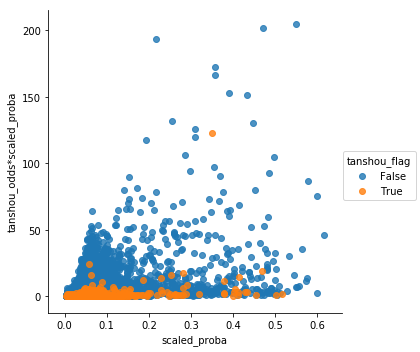

In [111]:
sns.lmplot(data=data_train,x="scaled_proba",y="tanshou_odds*scaled_proba", hue="tanshou_flag",fit_reg=False)


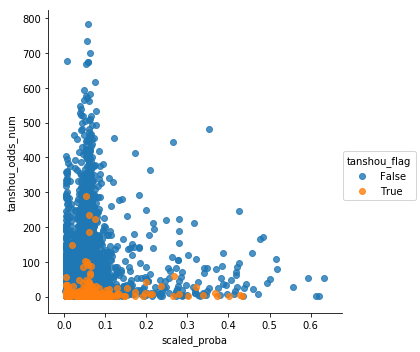

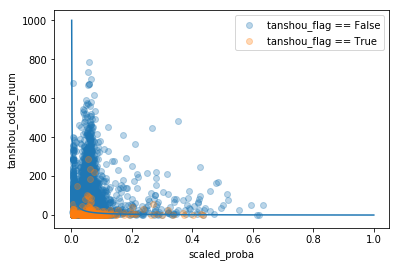

In [114]:
sns.lmplot(data=data_test,x="scaled_proba",y="tanshou_odds_num", hue="tanshou_flag",fit_reg=False)
x = np.linspace(0.001,1,1000)
plt.figure(0)
plt.plot(x,1/x)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == False,"scaled_proba"],data_test.loc[data_test["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == True,"scaled_proba"],data_test.loc[data_test["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
plt.legend()
plt.xlabel("scaled_proba")
plt.ylabel("tanshou_odds_num")
plt.show()

うまく行ってないことがわかる

## RandomForestでやってみる

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf = RandomForestClassifier(random_state=0)

In [68]:
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [69]:
train_y_pred = clf.predict(X_train)
test_y_pred = clf.predict(X_test)
print("confusion_matrix in train")
print(confusion_matrix(y_train,train_y_pred))
print("confusion_matrix in test")
print(confusion_matrix(y_test,test_y_pred))

confusion_matrix in train
[[21100    11]
 [  219  1348]]
confusion_matrix in test
[[5193   82]
 [ 332   63]]


In [70]:
tn, fp, fn, tp = confusion_matrix(y_train,train_y_pred).ravel()
print("トレインデータでの精度＝",tp/(tp+fp))
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print("テストデータでの精度＝",tp/(tp+fp))

トレインデータでの精度＝ 0.991905813098
テストデータでの精度＝ 0.434482758621


In [71]:
train_kaisyuuritu = data_train_TP["tanshou_odds_num"].sum()/(data_train.loc[data_train["predict"]==True,:].shape[0])
print("train dataの回収率は",train_kaisyuuritu)
data_test_T = data_test.loc[data_test["tanshou_flag"] == True,:]
print(data_test_T.shape)
data_test_TP = data_test_T.loc[data_test_T["predict"] == True,:]
print(data_test_TP.shape)
test_kaisyuuritu = data_test_TP["tanshou_odds_num"].sum()/(data_test.loc[data_test["predict"]==True,:].shape[0])
print("test dataの回収率は",test_kaisyuuritu)

train dataの回収率は 10.359294871794871
(395, 24)
(25, 24)
test dataの回収率は 1.2799999999999998


In [103]:
param_grid = {"n_estimators": [10,50,100,150],"class_weight":[{1:1},{1:5},{1:10},{1:15}]}

In [104]:
clf = RandomForestClassifier(random_state=0)

In [105]:
grid_search = GridSearchCV(clf, param_grid, cv=5,scoring="precision",verbose=3,n_jobs=-1)

In [106]:
grid_search.fit(X_train, y_train.values.flatten())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   42.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 150], 'class_weight': [{1: 1}, {1: 5}, {1: 10}, {1: 15}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=3)

In [107]:
joblib.dump(grid_search, 'rf_gs.pkl') 

['rf_gs.pkl']

In [108]:
grid_search = joblib.load('rf_gs.pkl') 

In [109]:
result = pd.DataFrame(grid_search.cv_results_)
print(result.shape)
result

(16, 22)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_class_weight,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.205412,0.011201,0.372019,0.991492,{1: 1},10,"{'class_weight': {1: 1}, 'n_estimators': 10}",15,0.398230,0.993500,...,0.330645,0.990766,0.417391,0.994393,0.386555,0.991705,0.063749,0.000980,0.036526,0.002543
1,1.058460,0.049803,0.406986,0.997259,{1: 1},50,"{'class_weight': {1: 1}, 'n_estimators': 50}",9,0.396396,0.998381,...,0.363636,0.996772,0.473684,0.997583,0.408696,0.998388,0.239112,0.012304,0.036473,0.001202
2,1.991314,0.102806,0.401520,0.997596,{1: 1},100,"{'class_weight': {1: 1}, 'n_estimators': 100}",11,0.405172,0.999196,...,0.351351,0.996797,0.437500,0.997598,0.421053,0.997598,0.626651,0.025319,0.029280,0.000877
3,2.962569,0.140608,0.416762,0.998396,{1: 1},150,"{'class_weight': {1: 1}, 'n_estimators': 150}",6,0.422018,0.999196,...,0.355140,0.997594,0.460177,0.997600,0.433628,0.998397,0.844812,0.027076,0.034666,0.000715
4,0.165009,0.010001,0.375938,0.989381,{1: 5},10,"{'class_weight': {1: 5}, 'n_estimators': 10}",13,0.361111,0.990732,...,0.329545,0.987985,0.431373,0.990584,0.349057,0.990689,0.017676,0.001096,0.038037,0.001613
5,0.835648,0.047603,0.416683,0.991247,{1: 5},50,"{'class_weight': {1: 5}, 'n_estimators': 50}",7,0.438776,0.992806,...,0.368421,0.990453,0.443299,0.992045,0.405941,0.992045,0.098700,0.014278,0.027374,0.001407
6,2.053118,0.099806,0.413825,0.990983,{1: 5},100,"{'class_weight': {1: 5}, 'n_estimators': 100}",8,0.408602,0.992076,...,0.397849,0.989740,0.447917,0.992082,0.410000,0.992082,0.486092,0.024872,0.017558,0.001368
7,2.646551,0.159409,0.417233,0.990987,{1: 5},150,"{'class_weight': {1: 5}, 'n_estimators': 150}",5,0.443299,0.992076,...,0.382979,0.989731,0.447917,0.992089,0.409524,0.992089,0.440203,0.048622,0.024789,0.001367
8,0.198811,0.013401,0.374622,0.988332,{1: 10},10,"{'class_weight': {1: 10}, 'n_estimators': 10}",14,0.412844,0.989927,...,0.329787,0.987061,0.410000,0.991541,0.383838,0.989767,0.071938,0.005004,0.035358,0.002870
9,1.011458,0.059803,0.430783,0.991236,{1: 10},50,"{'class_weight': {1: 10}, 'n_estimators': 50}",1,0.443299,0.992794,...,0.370787,0.990423,0.478261,0.992051,0.420000,0.992032,0.290484,0.009766,0.035333,0.001410


In [110]:
result.to_csv("rf_gs_result.csv")

In [111]:
train_y_pred = grid_search.predict(X_train)
test_y_pred = grid_search.predict(X_test)

In [112]:
print("confusion_matrix in train")
print(confusion_matrix(y_train,train_y_pred))
print("confusion_matrix in test")
print(confusion_matrix(y_test,test_y_pred))

confusion_matrix in train
[[21093    18]
 [   12  1555]]
confusion_matrix in test
[[5210   65]
 [ 343   52]]


In [113]:
tn, fp, fn, tp = confusion_matrix(y_train,train_y_pred).ravel()
print("トレインデータでの精度＝",tp/(tp+fp))
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print("テストデータでの精度＝",tp/(tp+fp))

トレインデータでの精度＝ 0.988556897648
テストデータでの精度＝ 0.444444444444


In [114]:
data_train.loc[:,"predict"] = pd.Series(train_y_pred,index=data_train.index)
data_test.loc[:,"predict"] = pd.Series(test_y_pred,index=data_test.index)
data_train_T = data_train.loc[data_train["tanshou_flag"] == True,:]
data_train_TP = data_train_T.loc[data_train_T["predict"] == True,:]
train_kaisyuuritu = data_train_TP["tanshou_odds_num"].sum()/(data_train.loc[data_train["predict"]==True,:].shape[0])
print("train dataの回収率は",train_kaisyuuritu)

data_test_T = data_test.loc[data_test["tanshou_flag"] == True,:]
print(data_test_T.shape)
data_test_TP = data_test_T.loc[data_test_T["predict"] == True,:]
print(data_test_TP.shape)
test_kaisyuuritu = data_test_TP["tanshou_odds_num"].sum()/(data_test.loc[data_test["predict"]==True,:].shape[0])
print("test dataの回収率は",test_kaisyuuritu)

train dataの回収率は 11.045772409408773
(395, 24)
(52, 24)
test dataの回収率は 1.152136752136752


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [116]:
tr_predict_proba = grid_search.predict_proba(X_train)
tr_predict = grid_search.predict(X_train)
te_predict_proba = grid_search.predict_proba(X_test)
te_predict = grid_search.predict(X_test)

df_tr_proba = pd.DataFrame(tr_predict_proba)
df_tr_proba.index = data_train.index.values[:22678]
df_tr_proba.loc[tr_predict,:].head()

,0,1
13300,0.24,0.76
21135,0.36,0.64
27632,0.16,0.84
13111,0.06,0.94
17922,0.38,0.62


In [117]:
data_train.loc[:,"tanshou_proba_rf"] = df_tr_proba.loc[:,1]
data_train.loc[:,"tanshou_odds*tanshou_proba_rf"] = data_train["tanshou_odds_num"] * data_train["tanshou_proba_rf"]
data_train.head()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba,tanshou_proba_rf,tanshou_odds*tanshou_proba_rf
6847,04162a0311,1310911220160828,テンエイロータス,7,12,460,109,12.9,53.1,7.6,...,109.0,53.1,35.0,3.0,False,False,0.062029,6.761179,0.00,0.000
17671,315121212,1111005920150412,シンガン,12,4,490,8.3,2.5,7.6,2.2,...,8.3,7.6,47.0,3.0,False,False,0.060774,0.504421,0.00,0.000
438,716341005,1310565220160710,サトノエトワール,4,6,494,13.4,3.1,15.1,3.5,...,13.4,15.1,55.0,3.0,False,False,0.053268,0.713787,0.02,0.268
26393,215160612,1110261320150705,タマモエスカルゴ,8,5,462,16.9,2.3,11.6,2.4,...,16.9,11.6,40.0,3.0,False,False,0.054233,0.916544,0.00,0.000
3389,816470701,1310034020161023,シルバーメール,10,6,438,15.9,3.1,8.8,3.3,...,15.9,8.8,42.0,3.0,False,False,0.043918,0.698290,0.02,0.318


In [118]:
tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba_rf"])>1,:]
print(tr_kaime.shape)
tr_kaime.head()

(3207, 26)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba,tanshou_proba_rf,tanshou_odds*tanshou_proba_rf
14848,616151214,1110540120160116,フィリグラーナ,12,14,446,197.8,23.3,56.7,7,...,197.8,56.7,48.0,3.0,False,False,0.059719,11.812511,0.02,3.956
2609,516151003,1010587220160213,ランドマーキュリー,10,6,520,8.4,2,8.3,3.3,...,8.4,8.3,51.0,3.0,False,False,0.052969,0.444938,0.12,1.008
5647,916431107,910583420160917,グッドマイスター,11,10,464,51,6.1,30,5.8,...,51.0,30.0,50.0,3.0,False,False,0.060712,3.096314,0.06,3.060
13300,816391211,1210450320160521,パフォーマプロミス,1,1,452,2.3,1.1,2.5,1.2,...,2.3,2.5,59.0,3.0,True,True,0.187535,0.431331,0.76,1.748
21135,615281210,1110464920150322,ゼンノヒストリエ,1,3,506,7.2,2.1,7.9,2.9,...,7.2,7.9,56.0,3.0,True,True,0.061480,0.442659,0.64,4.608


In [119]:
tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
print(tr_kaime_TP.shape)
tr_kaime_TP.head()


(1554, 26)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba,tanshou_proba_rf,tanshou_odds*tanshou_proba_rf
13300,816391211,1210450320160521,パフォーマプロミス,1,1,452,2.3,1.1,2.5,1.2,...,2.3,2.5,59.0,3.0,True,True,0.187535,0.431331,0.76,1.748
21135,615281210,1110464920150322,ゼンノヒストリエ,1,3,506,7.2,2.1,7.9,2.9,...,7.2,7.9,56.0,3.0,True,True,0.061480,0.442659,0.64,4.608
27632,815260903,910374320150215,レッドグランザ,1,1,510,2.5,1.1,2.7,1.2,...,2.5,2.7,60.0,3.0,True,True,0.228875,0.572187,0.84,2.100
13111,516291204,1110374320160521,ヘイジームーン,1,1,494,2.4,1.1,2.6,1.1,...,2.4,2.6,60.0,3.0,True,True,0.519707,1.247297,0.94,2.256
17922,915260511,1010410520150412,ヒドゥンブレイド,1,5,492,10,2.8,10.6,2.5,...,10.0,10.6,53.0,3.0,True,True,0.087519,0.875187,0.62,6.200


In [120]:
train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
print(train_kaisyuuritu)

5.489897100093542


In [121]:
df_te_proba = pd.DataFrame(te_predict_proba)
df_te_proba.index = data_test.index.values[:5798]
print(df_te_proba.shape)
df_te_proba.head()

(5670, 2)


,0,1
676,1.00,0.00
28154,0.94,0.06
16830,1.00,0.00
8046,1.00,0.00
9267,0.94,0.06


In [122]:
data_test.loc[:,"tanshou_proba_rf"] = df_te_proba.loc[:,1]
data_test.loc[:,"tanshou_odds*tanshou_proba_rf"] = data_test["tanshou_odds_num"] * data_test["tanshou_proba_rf"]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [124]:
te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba_rf"])>1,:]
print(te_kaime.shape)
te_kaime.head()

(1314, 26)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba,tanshou_proba_rf,tanshou_odds*tanshou_proba_rf
13249,816390901,1310560620160521,ファスナハト,8,8,540,30.7,5.4,16.3,3.8,...,30.7,16.3,45.0,5.0,False,False,0.063492,1.949205,0.04,1.228
6059,1016130314,1310477420160220,パーリオミノル,5,10,440,30.4,8.2,25,7.4,...,30.4,25.0,36.0,3.0,False,False,0.093295,2.836172,0.14,4.256
22617,715141109,1010456220150125,ソロル,5,7,504,25.8,3.3,17.1,3.3,...,25.8,17.1,68.0,3.0,False,False,0.092467,2.385660,0.36,9.288
619,416111210,1110348520160430,クワトロガッツ,2,2,456,3.1,1.3,4.3,1.7,...,3.1,4.3,53.0,3.0,False,True,0.192241,0.595947,0.72,2.232
12067,316111005,1310576720160409,シャインレッド,6,3,496,5.9,1.4,2.8,1.1,...,5.9,2.8,43.0,3.0,False,False,0.097289,0.574006,0.30,1.770


In [125]:
te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
print(te_kaime_TP.shape)
te_kaime_TP.head()

(176, 26)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba,tanshou_proba_rf,tanshou_odds*tanshou_proba_rf
19597,515140616,1010435320150208,クロムレック,1,1,538,2.2,1.2,2.6,1.3,...,2.2,2.6,52.0,3.0,True,True,0.505638,1.112403,0.520000,1.144000
12333,916250412,1310602520160409,エルプシャフト,1,1,438,2.2,1.2,1.9,1.1,...,2.2,1.9,43.0,3.0,True,False,0.322390,0.709258,0.460000,1.012000
18966,815461201,1210558620151024,ダノングッド,1,5,496,6.5,1.9,6.7,2.6,...,6.5,6.7,59.0,3.0,True,False,0.041519,0.269875,0.300000,1.950000
4814,916421210,1310449620160911,ミエノサクシード,1,4,444,12.1,2.4,9.2,3.3,...,12.1,9.2,57.0,3.0,True,False,0.056585,0.684684,0.236667,2.863667
17080,515150604,1210622620150214,トゥルッリ,1,9,476,31.8,4.5,16.5,3.9,...,31.8,16.5,54.0,3.0,True,False,0.083616,2.658985,0.120000,3.816000


In [126]:
test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
print(test_kaisyuuritu)

1.6121765601217657


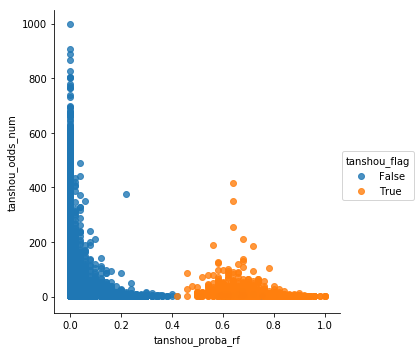

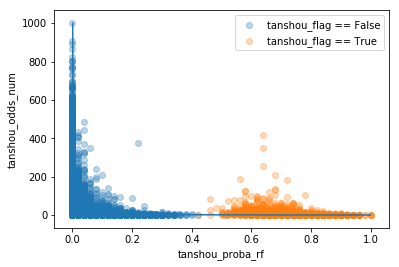

In [127]:
sns.lmplot(data=data_train,x="tanshou_proba_rf",y="tanshou_odds_num", hue="tanshou_flag",fit_reg=False)
x = np.linspace(0.001,1,1000)
plt.figure(0)
plt.plot(x,1/x)
plt.scatter(data_train.loc[data_train["tanshou_flag"] == False,"tanshou_proba_rf"],data_train.loc[data_train["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
plt.scatter(data_train.loc[data_train["tanshou_flag"] == True,"tanshou_proba_rf"],data_train.loc[data_train["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
plt.legend()
plt.xlabel("tanshou_proba_rf")
plt.ylabel("tanshou_odds_num")
plt.show()

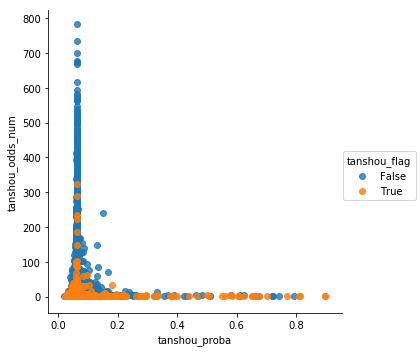

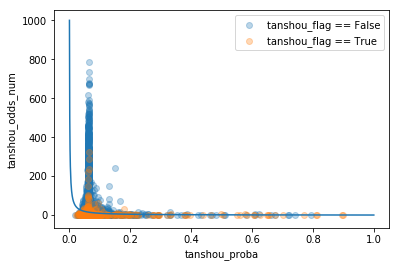

In [128]:
sns.lmplot(data=data_test,x="tanshou_proba",y="tanshou_odds_num", hue="tanshou_flag",fit_reg=False)
x = np.linspace(0.001,1,1000)
plt.figure(0)
plt.plot(x,1/x)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == False,"tanshou_proba"],data_test.loc[data_test["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == True,"tanshou_proba"],data_test.loc[data_test["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
plt.legend()
plt.xlabel("tanshou_proba")
plt.ylabel("tanshou_odds_num")
plt.show()

閾値 0.5
トレインデータ:
回収率= 3.5967346938775497
買い目数= 4900
TP= 1567
精度= 0.31979591836734694
テストデータ:
回収率= 1.4898445595854923
買い目数= 1930
TP= 291
精度= 0.15077720207253886
________________________________________________________________


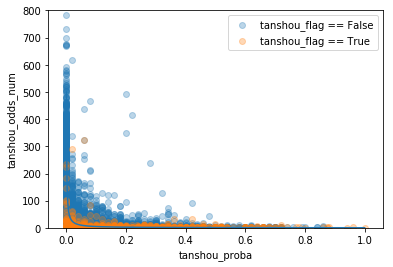

閾値 0.8
トレインデータ:
回収率= 4.824527785381876
買い目数= 3653
TP= 1567
精度= 0.42896249657815494
テストデータ:
回収率= 1.6140039447731753
買い目数= 1521
TP= 219
精度= 0.14398422090729784
________________________________________________________________


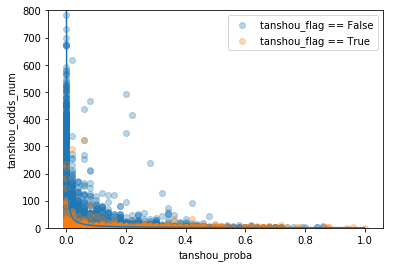

閾値 1
トレインデータ:
回収率= 5.489897100093542
買い目数= 3207
TP= 1554
精度= 0.4845650140318054
テストデータ:
回収率= 1.6121765601217657
買い目数= 1314
TP= 176
精度= 0.1339421613394216
________________________________________________________________


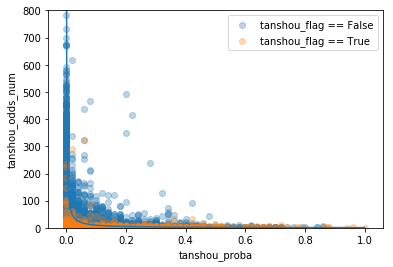

閾値 1.1
トレインデータ:
回収率= 5.797528830313013
買い目数= 3035
TP= 1547
精度= 0.5097199341021417
テストデータ:
回収率= 1.6478405315614617
買い目数= 1204
TP= 146
精度= 0.1212624584717608
________________________________________________________________


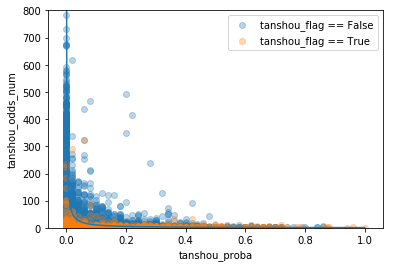

閾値 1.3
トレインデータ:
回収率= 6.553684998129437
買い目数= 2673
TP= 1497
精度= 0.5600448933782267
テストデータ:
回収率= 1.7516798418972335
買い目数= 1012
TP= 117
精度= 0.11561264822134387
________________________________________________________________


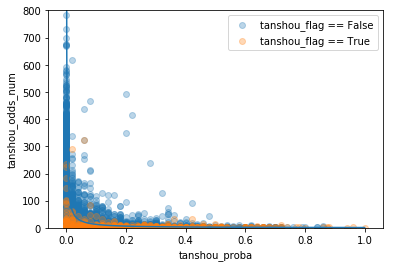

閾値 1.5
トレインデータ:
回収率= 7.312741799831788
買い目数= 2378
TP= 1428
精度= 0.6005046257359126
テストデータ:
回収率= 1.8478711162255468
買い目数= 869
TP= 90
精度= 0.10356731875719218
________________________________________________________________


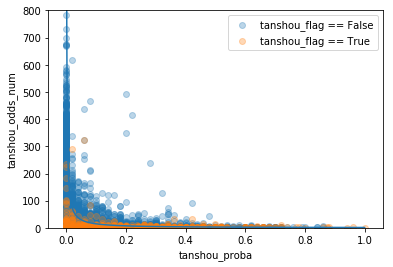

閾値 2
トレインデータ:
回収率= 8.92956932773109
買い目数= 1904
TP= 1263
精度= 0.6633403361344538
テストデータ:
回収率= 2.153140096618358
買い目数= 621
TP= 51
精度= 0.0821256038647343
________________________________________________________________


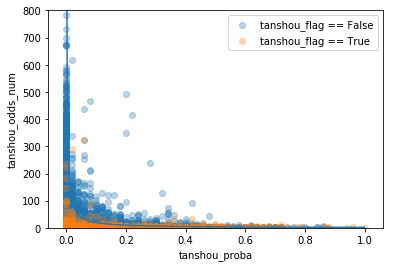

閾値 3
トレインデータ:
回収率= 12.457378335949771
買い目数= 1274
TP= 932
精度= 0.7315541601255887
テストデータ:
回収率= 3.121700879765396
買い目数= 341
TP= 20
精度= 0.05865102639296188
________________________________________________________________


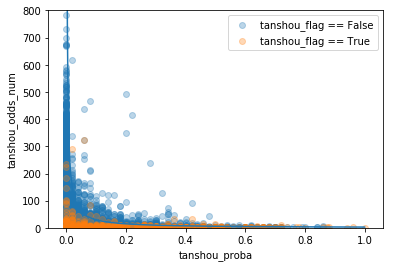

閾値 4
トレインデータ:
回収率= 16.136984815618227
買い目数= 922
TP= 729
精度= 0.7906724511930586
テストデータ:
回収率= 3.978111587982833
買い目数= 233
TP= 15
精度= 0.06437768240343347
________________________________________________________________


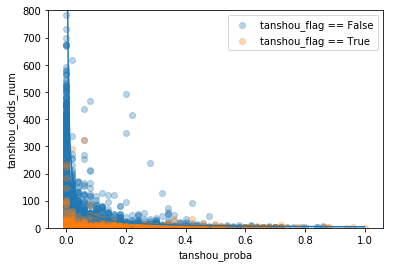

閾値 5
トレインデータ:
回収率= 19.720028409090915
買い目数= 704
TP= 573
精度= 0.8139204545454546
テストデータ:
回収率= 4.997530864197532
買い目数= 162
TP= 9
精度= 0.05555555555555555
________________________________________________________________


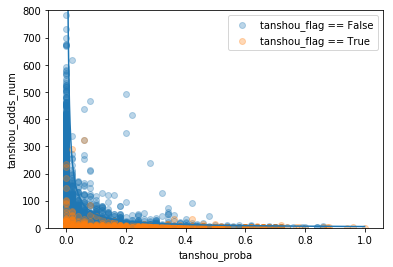

閾値 6
トレインデータ:
回収率= 23.5119349005425
買い目数= 553
TP= 461
精度= 0.833634719710669
テストデータ:
回収率= 3.8833333333333333
買い目数= 132
TP= 7
精度= 0.05303030303030303
________________________________________________________________


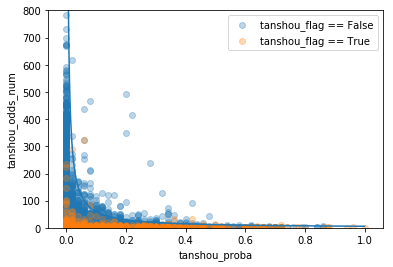

閾値 7
トレインデータ:
回収率= 27.261283185840703
買い目数= 452
TP= 391
精度= 0.8650442477876106
テストデータ:
回収率= 4.312121212121212
買い目数= 99
TP= 6
精度= 0.06060606060606061
________________________________________________________________


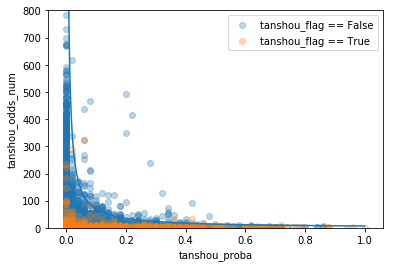

閾値 8
トレインデータ:
回収率= 30.360937499999995
買い目数= 384
TP= 333
精度= 0.8671875
テストデータ:
回収率= 5.286301369863013
買い目数= 73
TP= 3
精度= 0.0410958904109589
________________________________________________________________


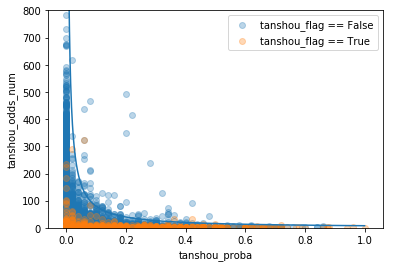

閾値 9
トレインデータ:
回収率= 33.90975609756097
買い目数= 328
TP= 291
精度= 0.8871951219512195
テストデータ:
回収率= 6.770175438596491
買い目数= 57
TP= 3
精度= 0.05263157894736842
________________________________________________________________


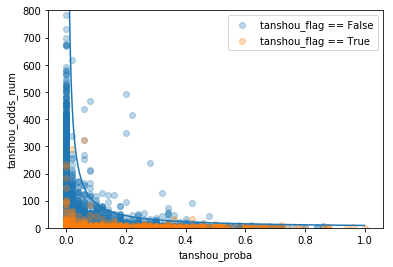

閾値 10
トレインデータ:
回収率= 36.160738255033564
買い目数= 298
TP= 266
精度= 0.8926174496644296
テストデータ:
回収率= 8.974418604651163
買い目数= 43
TP= 3
精度= 0.06976744186046512
________________________________________________________________


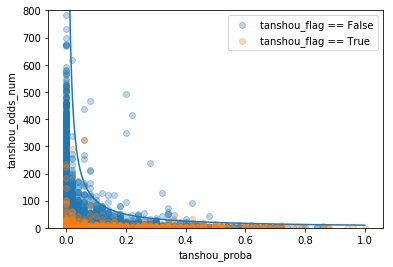

In [129]:
for i in [0.5,0.8,1,1.1,1.3,1.5,2,3,4,5,6,7,8,9,10]:
    
    print("閾値",i)
    tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba_rf"])>i,:]
    tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
    train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
    print("トレインデータ:")
    print("回収率=",train_kaisyuuritu)
    print("買い目数=",tr_kaime.shape[0])
    print("TP=",tr_kaime_TP.shape[0])
    print("精度=",tr_kaime_TP.shape[0]/tr_kaime.shape[0])

    te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba_rf"])>i,:]
    te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
    test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
    print("テストデータ:")
    print("回収率=",test_kaisyuuritu)
    print("買い目数=",te_kaime.shape[0])
    print("TP=",te_kaime_TP.shape[0])
    print("精度=",te_kaime_TP.shape[0]/te_kaime.shape[0])
    
    print("________________________________________________________________")
    x = np.linspace(0.001,1,1000)
    plt.figure(0)
    plt.plot(x,i/x)
    plt.scatter(data_test.loc[data_test["tanshou_flag"] == False,"tanshou_proba_rf"],data_test.loc[data_test["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
    plt.scatter(data_test.loc[data_test["tanshou_flag"] == True,"tanshou_proba_rf"],data_test.loc[data_test["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
    plt.legend()
    plt.xlabel("tanshou_proba")
    plt.ylabel("tanshou_odds_num")
    plt.ylim(0,800)
    plt.show()

閾値 10
トレインデータ:
回収率= 36.160738255033564
買い目数= 298
TP= 266
精度= 0.8926174496644296
テストデータ:
回収率= 8.974418604651163
買い目数= 43
TP= 3
精度= 0.06976744186046512
________________________________________________________________


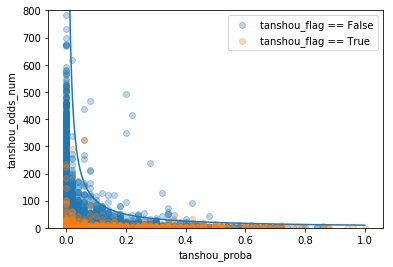

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba,tanshou_proba_rf,tanshou_odds*tanshou_proba_rf
26918,515180805,1010289420150222,ビリオネア,1,9,444,32.3,6.1,17,4.2,...,32.3,17.0,57.0,3.0,True,False,0.180099,5.817205,0.42,13.566
8136,1016151013,1110174920160227,マルーンドロップ,1,10,458,31.3,5.1,14.7,3.9,...,31.3,14.7,54.0,3.0,True,False,0.089359,2.796927,0.36,11.268
28208,815180209,1211000420150124,シゲルエベッサン,1,15,478,322.3,44.1,160.9,19.7,...,322.3,160.9,41.0,3.0,True,False,0.063637,20.510285,0.06,19.338


In [134]:
i = 10
    
print("閾値",i)
tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba_rf"])>i,:]
tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
print("トレインデータ:")
print("回収率=",train_kaisyuuritu)
print("買い目数=",tr_kaime.shape[0])
print("TP=",tr_kaime_TP.shape[0])
print("精度=",tr_kaime_TP.shape[0]/tr_kaime.shape[0])

te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba_rf"])>i,:]
te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
print("テストデータ:")
print("回収率=",test_kaisyuuritu)
print("買い目数=",te_kaime.shape[0])
print("TP=",te_kaime_TP.shape[0])
print("精度=",te_kaime_TP.shape[0]/te_kaime.shape[0])
    
print("________________________________________________________________")
x = np.linspace(0.001,1,1000)
plt.figure(0)
plt.plot(x,i/x)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == False,"tanshou_proba_rf"],data_test.loc[data_test["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == True,"tanshou_proba_rf"],data_test.loc[data_test["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
plt.legend()
plt.xlabel("tanshou_proba")
plt.ylabel("tanshou_odds_num")
plt.ylim(0,800)
plt.show()

te_kaime_TP.loc[(data_test["tanshou_odds*tanshou_proba_rf"])>10,:]

ビリオネア:http://db.netkeiba.com/race/201505010808/  
マルーンドロップ:http://db.netkeiba.com/race/201610010510/  
シゲルエベッサン:http://db.netkeiba.com/race/201508010802/  
データは正しい

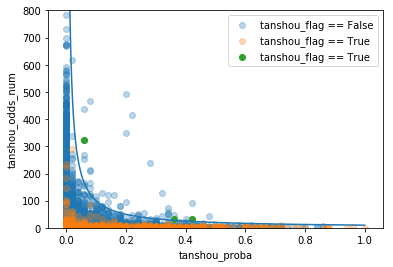

In [142]:
i = 10

x = np.linspace(0.001,1,1000)
plt.figure(0)
plt.plot(x,i/x)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == False,"tanshou_proba_rf"],data_test.loc[data_test["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
plt.scatter(data_test.loc[data_test["tanshou_flag"] == True,"tanshou_proba_rf"],data_test.loc[data_test["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
plt.scatter(te_kaime_TP.loc[te_kaime_TP["tanshou_odds*tanshou_proba_rf"] > 10,"tanshou_proba_rf"],te_kaime_TP.loc[te_kaime_TP["tanshou_odds*tanshou_proba_rf"] > 10,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=1)
plt.legend()
plt.xlabel("tanshou_proba")
plt.ylabel("tanshou_odds_num")
plt.ylim(0,800)
plt.show()

グリッドサーチをしてパラメータを決めるのもアルゴリズムの一部として，train,testを5分割交差検証する

In [10]:
data = pd.read_csv("data.csv",encoding="shift-jis")
print(data.shape)
data.head()

(28348, 21)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,hot_code,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,...,3,2162201,2,4,412,15.8,14.4,31.0,3.0,False
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1.0,6.4,1.1,...,3,2162201,6,2,418,6.9,6.4,18.0,3.0,False
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10.0,58.3,10.1,...,3,2162201,8,9,458,145.4,58.3,11.0,3.0,False
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,...,3,2162201,7,5,408,19.8,16.4,15.0,3.0,False
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,...,3,2162201,4,8,442,102.3,39.1,29.0,3.0,False


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   41.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, pl

予想Pを買うとき，train dataの回収率は 11.580063291139231
(395, 22)
(45, 22)
予想Pを買うとき，test dataの回収率は 0.8730158730158728


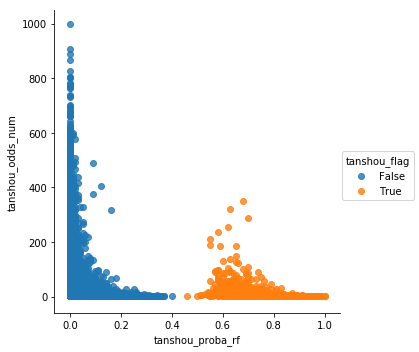

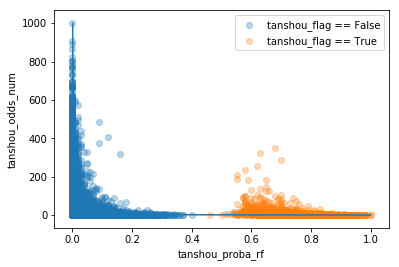

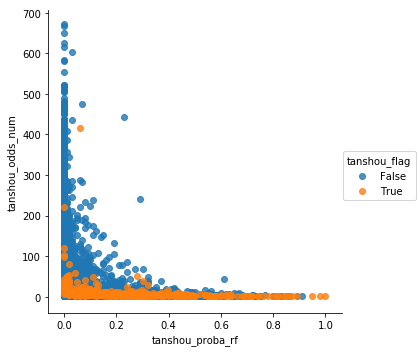

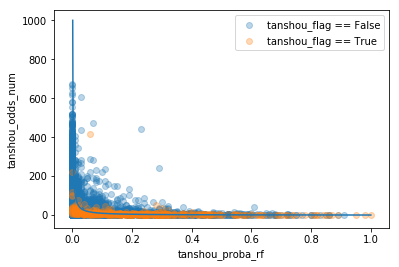

閾値 0.5
トレインデータ:
回収率= 3.5593543368339136
買い目数= 5142
TP= 1567
精度= 0.30474523531699726
テストデータ:
回収率= 1.305555555555556
買い目数= 2178
TP= 298
精度= 0.13682277318640956
________________________________________________________________
閾値 0.8
トレインデータ:
回収率= 4.935868392664505
買い目数= 3708
TP= 1567
精度= 0.42259978425026967
テストデータ:
回収率= 1.3943262411347528
買い目数= 1692
TP= 220
精度= 0.13002364066193853
________________________________________________________________
閾値 1
トレインデータ:
回収率= 5.715843749999994
買い目数= 3200
TP= 1558
精度= 0.486875
テストデータ:
回収率= 1.4783933518005545
買い目数= 1444
TP= 184
精度= 0.12742382271468145
________________________________________________________________
閾値 1.1
トレインデータ:
回収率= 6.1448067226890695
買い目数= 2975
TP= 1551
精度= 0.521344537815126
テストデータ:
回収率= 1.491805766312595
買い目数= 1318
TP= 162
精度= 0.12291350531107739
________________________________________________________________
閾値 1.3
トレインデータ:
回収率= 6.897236941710818
買い目数= 2642
TP= 1513
精度= 0.572672218016654
テストデータ:
回収率= 1.6100182149362479
買い目数= 1098

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   43.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, pl

 5.299999999999999
買い目数= 104
TP= 5
精度= 0.04807692307692308
________________________________________________________________
閾値 8
トレインデータ:
回収率= 32.418604651162795
買い目数= 387
TP= 341
精度= 0.8811369509043928
テストデータ:
回収率= 6.6674999999999995
買い目数= 80
TP= 4
精度= 0.05
________________________________________________________________
閾値 9
トレインデータ:
回収率= 35.85405405405406
買い目数= 333
TP= 293
精度= 0.8798798798798799
テストデータ:
回収率= 7.8984375
買い目数= 64
TP= 3
精度= 0.046875
________________________________________________________________
閾値 10
トレインデータ:
回収率= 39.18767123287671
買い目数= 292
TP= 259
精度= 0.886986301369863
テストデータ:
回収率= 10.11
買い目数= 50
TP= 3
精度= 0.06
________________________________________________________________
Fitting 5 folds for each of 16 candidates, totalling 80 fits
予想Pを買うとき，train dataの回収率は 11.382987012987003
(398, 22)
(61, 22)
予想Pを買うとき，test dataの回収率は 1.119736842105263


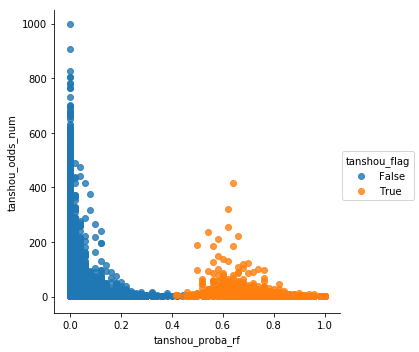

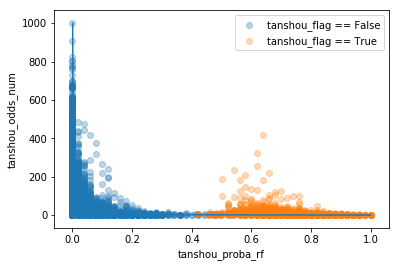

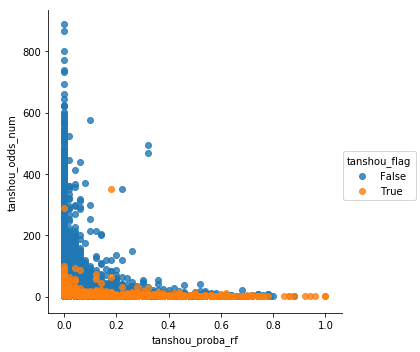

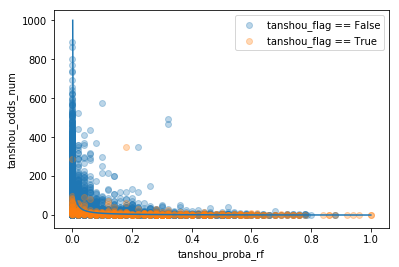

閾値 0.5
トレインデータ:
回収率= 3.480492057342114
買い目数= 5162
TP= 1564
精度= 0.3029833397907788
テストデータ:
回収率= 1.3976624590930335
買い目数= 2139
TP= 301
精度= 0.1407199625993455
________________________________________________________________
閾値 0.8
トレインデータ:
回収率= 4.648460543337643
買い目数= 3865
TP= 1564
精度= 0.40465717981888744
テストデータ:
回収率= 1.4834962622196661
買い目数= 1739
TP= 243
精度= 0.1397354801610121
________________________________________________________________
閾値 1
トレインデータ:
回収率= 5.369757702662277
買い目数= 3343
TP= 1554
精度= 0.4648519294047263
テストデータ:
回収率= 1.5215436241610731
買い目数= 1490
TP= 192
精度= 0.12885906040268458
________________________________________________________________
閾値 1.1
トレインデータ:
回収率= 5.713312101910824
買い目数= 3140
TP= 1545
精度= 0.49203821656050956
テストデータ:
回収率= 1.5951023391812862
買い目数= 1368
TP= 171
精度= 0.125
________________________________________________________________
閾値 1.3
トレインデータ:
回収率= 6.400537249283665
買い目数= 2792
TP= 1501
精度= 0.5376074498567335
テストデータ:
回収率= 1.5969543147208123
買い目数= 1182
TP=

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   42.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, pl

買い目数= 62
TP= 2
精度= 0.03225806451612903
________________________________________________________________
Fitting 5 folds for each of 16 candidates, totalling 80 fits
予想Pを買うとき，train dataの回収率は 11.459899434318038
(385, 22)
(53, 22)
予想Pを買うとき，test dataの回収率は 1.170689655172414


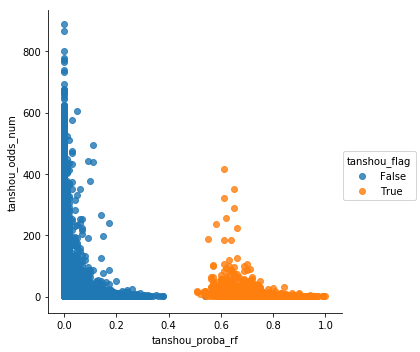

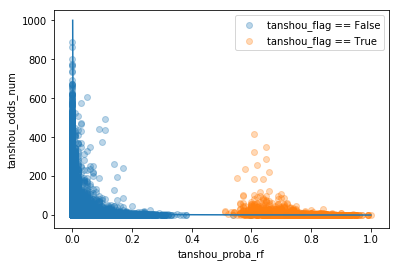

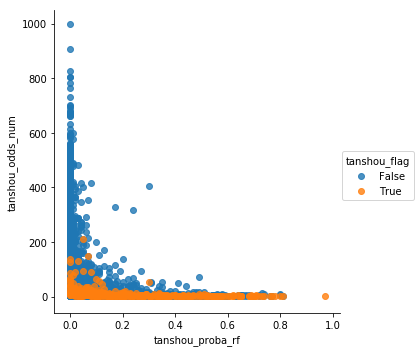

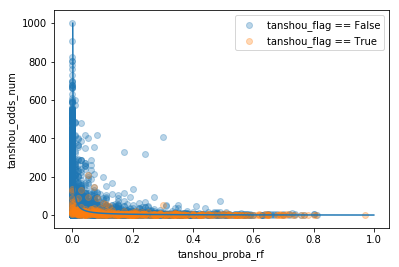

閾値 0.5
トレインデータ:
回収率= 3.625512030224696
買い目数= 5029
TP= 1577
精度= 0.31358122887253925
テストデータ:
回収率= 1.4710837671557029
買い目数= 2113
TP= 290
精度= 0.13724562233790819
________________________________________________________________
閾値 0.8
トレインデータ:
回収率= 4.955884751291111
買い目数= 3679
TP= 1577
精度= 0.42864908942647456
テストデータ:
回収率= 1.5470767356881858
買い目数= 1642
TP= 211
精度= 0.1285018270401949
________________________________________________________________
閾値 1
トレインデータ:
回収率= 5.780234771573602
買い目数= 3152
TP= 1566
精度= 0.49682741116751267
テストデータ:
回収率= 1.651523947750363
買い目数= 1378
TP= 162
精度= 0.11756168359941944
________________________________________________________________
閾値 1.1
トレインデータ:
回収率= 6.1083221476510055
買い目数= 2980
TP= 1555
精度= 0.5218120805369127
テストデータ:
回収率= 1.7699284009546536
買い目数= 1257
TP= 152
精度= 0.12092283214001591
________________________________________________________________
閾値 1.3
トレインデータ:
回収率= 6.870356330553448
買い目数= 2638
TP= 1504
精度= 0.5701288855193328
テストデータ:
回収率= 1.900844277673545

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   44.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, pl

予想Pを買うとき，train dataの回収率は 11.307716836734691
(392, 22)
(48, 22)
予想Pを買うとき，test dataの回収率は 1.188073394495413


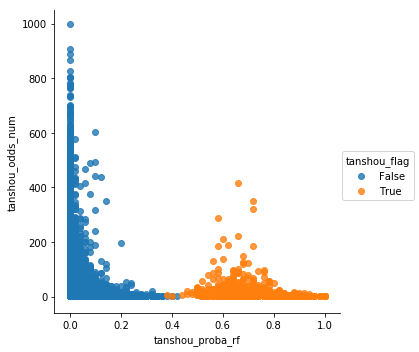

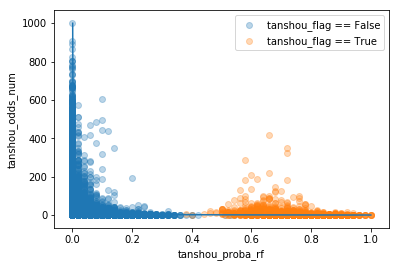

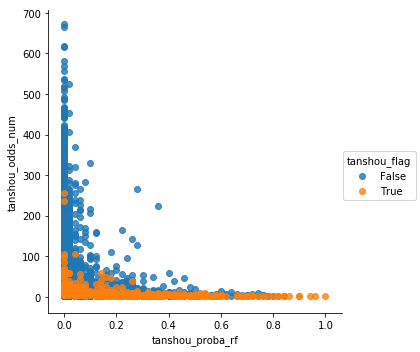

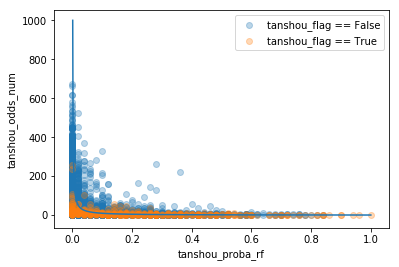

閾値 0.5
トレインデータ:
回収率= 3.6518045417680454
買い目数= 4932
TP= 1570
精度= 0.31832927818329276
テストデータ:
回収率= 1.3467032967032961
買い目数= 1820
TP= 277
精度= 0.15219780219780218
________________________________________________________________
閾値 0.8
トレインデータ:
回収率= 4.837684662906258
買い目数= 3723
TP= 1570
精度= 0.421702927746441
テストデータ:
回収率= 1.3831827658095903
買い目数= 1439
TP= 212
精度= 0.14732453092425296
________________________________________________________________
閾値 1
トレインデータ:
回収率= 5.597356143079317
買い目数= 3215
TP= 1559
精度= 0.4849144634525661
テストデータ:
回収率= 1.4142502071251042
買い目数= 1207
TP= 165
精度= 0.13670256835128416
________________________________________________________________
閾値 1.1
トレインデータ:
回収率= 5.940416391275612
買い目数= 3026
TP= 1545
精度= 0.5105750165234633
テストデータ:
回収率= 1.4694295900178258
買い目数= 1122
TP= 152
精度= 0.1354723707664884
________________________________________________________________
閾値 1.3
トレインデータ:
回収率= 6.65317962067683
買い目数= 2689
TP= 1492
精度= 0.554853105243585
テストデータ:
回収率= 1.430674846625768
買い目

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   42.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, pl

________________________________________________________________
閾値 7
トレインデータ:
回収率= 27.54190064794816
買い目数= 463
TP= 382
精度= 0.8250539956803455
テストデータ:
回収率= 2.147191011235955
買い目数= 89
TP= 4
精度= 0.0449438202247191
________________________________________________________________
閾値 8
トレインデータ:
回収率= 30.67878787878787
買い目数= 396
TP= 328
精度= 0.8282828282828283
テストデータ:
回収率= 1.9066666666666667
買い目数= 75
TP= 3
精度= 0.04
________________________________________________________________
閾値 9
トレインデータ:
回収率= 34.565773809523805
買い目数= 336
TP= 286
精度= 0.8511904761904762
テストデータ:
回収率= 0.6111111111111112
買い目数= 63
TP= 1
精度= 0.015873015873015872
________________________________________________________________
閾値 10
トレインデータ:
回収率= 37.929591836734694
買い目数= 294
TP= 253
精度= 0.8605442176870748
テストデータ:
回収率= 0.7403846153846154
買い目数= 52
TP= 1
精度= 0.019230769230769232
________________________________________________________________
Fitting 5 folds for each of 16 candidates, totalling 80 fits
予想Pを買うとき，train dataの回収率は 11.45

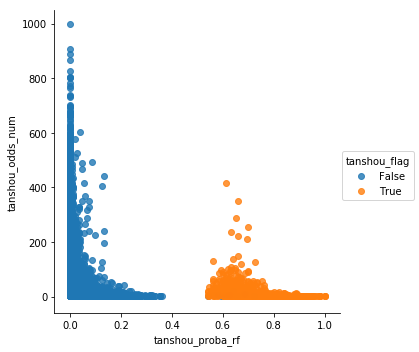

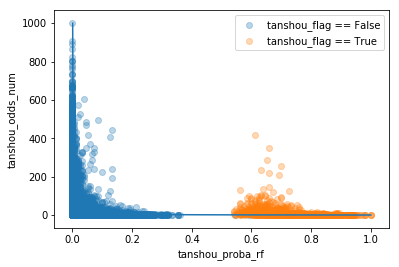

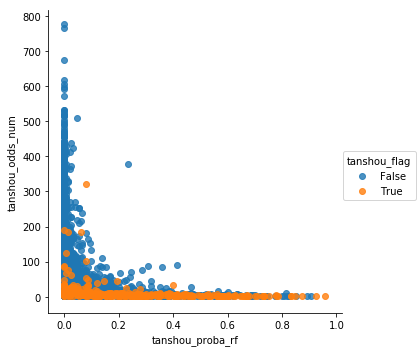

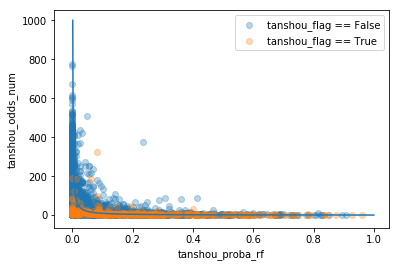

閾値 0.5
トレインデータ:
回収率= 3.5058789402436656
買い目数= 5171
TP= 1570
精度= 0.3036163217946239
テストデータ:
回収率= 1.6180319680319681
買い目数= 2002
TP= 291
精度= 0.14535464535464535
________________________________________________________________
閾値 0.8
トレインデータ:
回収率= 4.894411447084232
買い目数= 3704
TP= 1570
精度= 0.423866090712743
テストデータ:
回収率= 1.7803883495145645
買い目数= 1545
TP= 219
精度= 0.141747572815534
________________________________________________________________
閾値 1
トレインデータ:
回収率= 5.804261454661965
買い目数= 3121
TP= 1559
精度= 0.4995193848125601
テストデータ:
回収率= 1.8032659409020217
買い目数= 1286
TP= 171
精度= 0.13297045101088648
________________________________________________________________
閾値 1.1
トレインデータ:
回収率= 6.238917614615648
買い目数= 2901
TP= 1547
精度= 0.5332643915891072
テストデータ:
回収率= 1.8405063291139245
買い目数= 1185
TP= 156
精度= 0.13164556962025317
________________________________________________________________
閾値 1.3
トレインデータ:
回収率= 6.964851293935882
買い目数= 2589
TP= 1504
精度= 0.5809192738509077
テストデータ:
回収率= 1.9948103792415164
買い

In [27]:
kf = KFold(n_splits=5)
model_list =[]
data_train_list = []
data_test_list = []
y_train_list =[]
y_test_list = []
tr_kaime_list = []
tr_kaime_TP_list = []
te_kaime_list = []
te_kaime_TP_list = []
tr_kaisyuritu_list =[]
te_kaisyuritu_list=[]
tr_kaisyuritu_1 =[]
te_kaisyuritu_1 =[]
result_list =[]
tr_kaisyuritu_threshhold =[]
te_kaisyuritu_threshhold =[]
for train_index, test_index in kf.split(data):
    
    
    
      
    features = ["popularity_num","horse_weight_num","tanshou_odds_at10_num","IDM_num","hot_code_num"]
    target = ["tanshou_flag"]
    
    data_train = data.loc[train_index,:]
    data_test = data.loc[test_index,:]
    
    data_train_list.append(data_train)
    data_test_list.append(data_test)
    
    y = data.loc[:,target]
    y_train = y.loc[train_index,:]
    y_test = y.loc[test_index,:]
    
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    
    
    X_train = data_train.loc[:,features]
    X_test = data_test.loc[:,features]
    
    param_grid = {"n_estimators": [10,50,100,150],"class_weight":[{1:1},{1:5},{1:10},{1:15}]}
    clf = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(clf, param_grid, cv=5,scoring="precision",verbose=3,n_jobs=-1)
    grid_search.fit(X_train, y_train.values.flatten())
    model_list.append(grid_search)
    
    result = pd.DataFrame(grid_search.cv_results_)
    result_list.append(result)
    
    train_y_pred = grid_search.predict(X_train)
    test_y_pred = grid_search.predict(X_test)
    
    data_train.loc[:,"predict"] = pd.Series(train_y_pred,index=data_train.index)
    data_test.loc[:,"predict"] = pd.Series(test_y_pred,index=data_test.index)
    data_train_T = data_train.loc[data_train["tanshou_flag"] == True,:]
    data_train_TP = data_train_T.loc[data_train_T["predict"] == True,:]
    train_kaisyuuritu = data_train_TP["tanshou_odds_num"].sum()/(data_train.loc[data_train["predict"]==True,:].shape[0])
    print("予想Pを買うとき，train dataの回収率は",train_kaisyuuritu)
    tr_kaisyuritu_list.append(train_kaisyuuritu)

    data_test_T = data_test.loc[data_test["tanshou_flag"] == True,:]
    print(data_test_T.shape)
    data_test_TP = data_test_T.loc[data_test_T["predict"] == True,:]
    print(data_test_TP.shape)
    test_kaisyuuritu = data_test_TP["tanshou_odds_num"].sum()/(data_test.loc[data_test["predict"]==True,:].shape[0])
    print("予想Pを買うとき，test dataの回収率は",test_kaisyuuritu)
    te_kaisyuritu_list.append(test_kaisyuuritu)
    
    tr_predict_proba = grid_search.predict_proba(X_train)
    tr_predict = grid_search.predict(X_train)
    te_predict_proba = grid_search.predict_proba(X_test)
    te_predict = grid_search.predict(X_test)
 
    df_tr_proba = pd.DataFrame(tr_predict_proba)
    df_tr_proba.index = data_train.index.values[:data_train.shape[0]]
    
    data_train.loc[:,"tanshou_proba_rf"] = df_tr_proba.loc[:,1]
    data_train.loc[:,"tanshou_odds*tanshou_proba_rf"] = data_train["tanshou_odds_num"] * data_train["tanshou_proba_rf"]
    
    tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba_rf"])>1,:]
    tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
    
    tr_kaime_list.append(tr_kaime)
    tr_kaime_TP_list.append(tr_kaime_TP)
    
    train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
    tr_kaisyuritu_1.append(train_kaisyuuritu)
    

    df_te_proba = pd.DataFrame(te_predict_proba)
    df_te_proba.index = data_test.index.values[:data_test.shape[0]]
    
    data_test.loc[:,"tanshou_proba_rf"] = df_te_proba.loc[:,1]
    data_test.loc[:,"tanshou_odds*tanshou_proba_rf"] = data_test["tanshou_odds_num"] * data_test["tanshou_proba_rf"]
    
    te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba_rf"])>1,:]
    te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
    
    te_kaime_list.append(te_kaime)
    te_kaime_TP_list.append(te_kaime_TP)
    
    test_kaisyuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
    te_kaisyuritu_1.append(test_kaisyuritu)
    
    sns.lmplot(data=data_train,x="tanshou_proba_rf",y="tanshou_odds_num", hue="tanshou_flag",fit_reg=False)
    x = np.linspace(0.001,1,1000)
    plt.figure(0)
    plt.plot(x,1/x)
    plt.scatter(data_train.loc[data_train["tanshou_flag"] == False,"tanshou_proba_rf"],data_train.loc[data_train["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
    plt.scatter(data_train.loc[data_train["tanshou_flag"] == True,"tanshou_proba_rf"],data_train.loc[data_train["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
    plt.legend()
    plt.xlabel("tanshou_proba_rf")
    plt.ylabel("tanshou_odds_num")
    plt.show()
    
    sns.lmplot(data=data_test,x="tanshou_proba_rf",y="tanshou_odds_num", hue="tanshou_flag",fit_reg=False)
    x = np.linspace(0.001,1,1000)
    plt.figure(0)
    plt.plot(x,1/x)
    plt.scatter(data_test.loc[data_test["tanshou_flag"] == False,"tanshou_proba_rf"],data_test.loc[data_test["tanshou_flag"] == False,"tanshou_odds_num"], marker="o",label = "tanshou_flag == False",alpha=0.3)
    plt.scatter(data_test.loc[data_test["tanshou_flag"] == True,"tanshou_proba_rf"],data_test.loc[data_test["tanshou_flag"] == True,"tanshou_odds_num"], marker="o",label = "tanshou_flag == True", alpha=0.3)
    plt.legend()
    plt.xlabel("tanshou_proba_rf")
    plt.ylabel("tanshou_odds_num")
    plt.show()
    
    tr_kaisyuritu =[]
    te_kaisyuritu = []

    for i in [0.5,0.8,1,1.1,1.3,1.5,2,3,4,5,6,7,8,9,10]:
    
        print("閾値",i)
        tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba_rf"])>i,:]
        tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
        train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
        print("トレインデータ:")
        print("回収率=",train_kaisyuuritu)
        print("買い目数=",tr_kaime.shape[0])
        print("TP=",tr_kaime_TP.shape[0])
        print("精度=",tr_kaime_TP.shape[0]/tr_kaime.shape[0])
        
        tr_kaisyuritu.append(train_kaisyuuritu)

        te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba_rf"])>i,:]
        te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
        test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
        print("テストデータ:")
        print("回収率=",test_kaisyuuritu)
        print("買い目数=",te_kaime.shape[0])
        print("TP=",te_kaime_TP.shape[0])
        print("精度=",te_kaime_TP.shape[0]/te_kaime.shape[0])
        
        te_kaisyuritu.append(test_kaisyuuritu)
    
        print("________________________________________________________________")
        
    tr_kaisyuritu_threshhold.append(tr_kaisyuritu)
    te_kaisyuritu_threshhold.append(te_kaisyuritu)
    

In [30]:
df_te_kaisyuritu = pd.DataFrame(te_kaisyuritu_threshhold)
df_te_kaisyuritu.columns = [0.5,0.8,1,1.1,1.3,1.5,2,3,4,5,6,7,8,9,10]
df_te_kaisyuritu.head()

,0.5,0.8,1.0,1.1,1.3,1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,1.305556,1.394326,1.478393,1.491806,1.610018,1.758842,1.859049,2.354907,2.728516,3.446409,4.240000,5.300000,6.667500,7.898438,10.110000
1,1.397662,1.483496,1.521544,1.595102,1.596954,1.734260,1.944023,2.491017,3.266052,3.990094,4.226946,4.532353,5.344118,5.042683,6.669355
2,1.471084,1.547077,1.651524,1.769928,1.900844,1.992834,2.144479,2.808354,3.365574,3.930994,4.769466,4.692523,4.834118,6.132836,7.337500
3,1.346703,1.383183,1.414250,1.469430,1.430675,1.513993,1.631175,2.042388,2.091589,1.966667,1.706250,2.147191,1.906667,0.611111,0.740385
4,1.618032,1.780388,1.803266,1.840506,1.994810,2.111425,2.644834,3.288079,4.843655,6.395082,8.303297,10.416667,12.276786,11.747826,15.011111


Text(0,0.5,'Recovery rate')

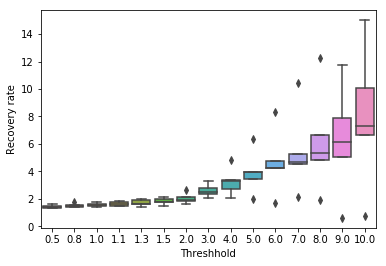

In [35]:
sns.boxplot(data=df_te_kaisyuritu)
plt.xlabel("Threshhold")
plt.ylabel("Recovery rate")


Text(0,0.5,'Recovery rate')

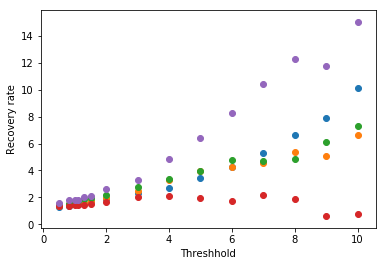

In [37]:
plt.figure(0)
th = [0.5,0.8,1,1.1,1.3,1.5,2,3,4,5,6,7,8,9,10]
for i in range(5):
    plt.scatter(th,df_te_kaisyuritu.loc[i,:])
    
plt.xlabel("Threshhold")
plt.ylabel("Recovery rate")